## Import libraries

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

In [2]:
f = open("../Plotly Chart Studio Credentials.txt")
lines=f.readlines()
username=lines[0][:14]
api_key=lines[1]
f.close()

tls.set_credentials_file(username=username, api_key=api_key)

## Tema: Alquiler con Airbnb vs Alquiler con Inmobiliaria

## Preguntas de Investigación
1. ¿Dónde habría que invertir?
<br>H0: Supongo hay más demandas en ciudades grandes y donde haya más turistas.

2. ¿En qué tipo de vivienda habría que invertir?
<br>H0: Según este [artículo](https://www.igms.com/booking-com-vs-airbnb/#), los huéspedes de Airbnb suelen buscar un alojamiento que pueda ofrecerle una experiencia distinta y vivir como la gente local. Por lo tanto, supongo que sería un piso ubicado en el centro de ciudad/pueblo donde haya más cosas que ver.

![Huéspedes Airbnb](./image/airbnb_customers.jpg)

3. ¿Mejor poner una propieda en alquiler a través de Airbnb o a través de inmobiliaria?
<br>H0: Según la [página de Airbnb](https://www.airbnb.es/host/homes?room_type=PRIVATE_ROOM&adults=2), el propietario podría ganar 39 EUR/noche/dormitorio.

![Precio Airbnb ES](./image/airbnb_precio.jpg)

### 1. ¿Dónde habría que invertir?
<br>a. Las zonas donde hay más densidad de las propiedades de Airbnb
<br>b. Las ofertas inmobiliarias, tanto los precios de venta como los precios de alquiler
<br>c. Las zonas donde hay más viajeros alojados en viviendas turísticas 
<br>d. Las zonas donde hay más competencia de viviendas turísticas

#### Mirar los datos de inmobiliaria

Dataset: [Idealista](https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/canarias/)

In [3]:
idealista_pricing = pd.read_excel("data/idealista_pricing.xlsx")
idealista_pricing

,Comunidad,Precio Venta (EUR/m2),Precio Alquiler (EUR/m2/mes)
0,Andalucía,1970,9.7
1,Comunidad Valenciana,1656,9.0
2,Cataluña,2328,14.7
3,Canarias,2167,11.7
4,Islas Baleares,3746,14.5
5,Galicia,1353,7.7
6,Comunidad de Madrid,3111,14.8
7,Cantabria,1515,8.8
8,Castilla y León,1155,7.3
9,Murcia,1130,7.0


In [4]:
idealista_pricing = idealista_pricing.fillna(method="bfill")
idealista_pricing

,Comunidad,Precio Venta (EUR/m2),Precio Alquiler (EUR/m2/mes)
0,Andalucía,1970,9.7
1,Comunidad Valenciana,1656,9.0
2,Cataluña,2328,14.7
3,Canarias,2167,11.7
4,Islas Baleares,3746,14.5
5,Galicia,1353,7.7
6,Comunidad de Madrid,3111,14.8
7,Cantabria,1515,8.8
8,Castilla y León,1155,7.3
9,Murcia,1130,7.0


Standardizamos los datos para poder compararlos

In [7]:
idealista_selling_price_mean = idealista_pricing["Precio Venta (EUR/m2)"].mean()
idealista_selling_price_mean

1810.842105263158

In [8]:
idealista_selling_price_std = idealista_pricing["Precio Venta (EUR/m2)"].std()
idealista_selling_price_std

764.6841950299843

In [9]:
idealista_rental_price_mean = idealista_pricing["Precio Alquiler (EUR/m2/mes)"].mean()
idealista_rental_price_mean

9.605263157894735

In [10]:
idealista_rental_price_std = idealista_pricing["Precio Alquiler (EUR/m2/mes)"].std()
idealista_rental_price_std

2.8111827649606305

In [163]:
idealista_pricing["Precio Venta Estandarizado"] = (idealista_pricing["Precio Venta (EUR/m2)"] - idealista_selling_price_mean) / idealista_selling_price_std
idealista_pricing["Precio Alquiler Estandarizado"] = (idealista_pricing["Precio Alquiler (EUR/m2/mes)"] - idealista_rental_price_mean) / idealista_rental_price_std
idealista_pricing

,Comunidad,Precio Venta (EUR/m2),Precio Alquiler (EUR/m2/mes),Precio Venta Estandarizado,Precio Alquiler Estandarizado
0,Andalucía,1970,9.7,0.208135,0.033700
1,Comunidad Valenciana,1656,9.0,-0.202492,-0.215306
2,Cataluña,2328,14.7,0.676303,1.812311
3,Canarias,2167,11.7,0.465758,0.745144
4,Islas Baleares,3746,14.5,2.530663,1.741166
5,Galicia,1353,7.7,-0.598734,-0.677744
6,Comunidad de Madrid,3111,14.8,1.700255,1.847883
7,Cantabria,1515,8.8,-0.386881,-0.286450
8,Castilla y León,1155,7.3,-0.857664,-0.820033
9,Murcia,1130,7.0,-0.890357,-0.926750


El gráfico sin los datos estandarizados

In [164]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig_1 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_1.add_trace(
    go.Line(x=idealista_pricing["Comunidad"], y=idealista_pricing["Precio Venta (EUR/m2)"], 
           name="Precio de Venta (EUR/m2)"),
    secondary_y=False,
)

fig_1.add_trace(
    go.Line(x=idealista_pricing["Comunidad"], y=idealista_pricing["Precio Alquiler (EUR/m2/mes)"], 
           name="Precio de Alquiler (EUR/m2/mes)"),
    secondary_y=True,
)

# Add figure title and legend
fig_1.update_layout(
    title_text="<b>Ofertas Inmobiliarias en España (Fuente: Idealista)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_1.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_1.update_yaxes(title_text="<b>Precios de Ventas</b>", secondary_y=False)
fig_1.update_yaxes(title_text="<b>Precios de Alquiler</b>", secondary_y=True)

fig_1.show()

c:\Users\Selvie\anaconda3\envs\eda_env\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [166]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_1, filename="figure 1", auto_open=False)

'https://plotly.com/~selvie.carolin/45/'

El gráfico con los datos estandarizados

In [167]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig_01 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_01.add_trace(
    go.Line(x=idealista_pricing["Comunidad"], y=idealista_pricing["Precio Venta Estandarizado"], 
           name="Precio de Venta Estandarizado"),
    secondary_y=False,
)

fig_01.add_trace(
    go.Line(x=idealista_pricing["Comunidad"], y=idealista_pricing["Precio Alquiler Estandarizado"], 
           name="Precio de Alquiler Estandarizado"),
    secondary_y=False,
)

# Add figure title and legend
fig_01.update_layout(
    title_text="<b>Ofertas Inmobiliarias en España (Fuente: Idealista)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_01.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_01.update_yaxes(title_text="<b>Precios Estandarizados</b>", secondary_y=False)

fig_01.show()

In [168]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_01, filename="figure 01", auto_open=False)

'https://plotly.com/~selvie.carolin/47/'

In [159]:
idealista_pricing.to_csv("dashboard/idealista_pricing.csv", encoding="utf-8")

Comentario:
- No se ve mucha diferencia entre el gráfico sin los datos estandarizados y él con los datos estandarizados. Para evitar confusión, utilizaré el gráfico sin los datos estandarizados.
- En el gráfico, los precios de venta y los de alquiler se ven bastante alineados, menos en Cataluña donde hay una diferencia significativa entre ambos precios donde el precio de venta está por debajo del precio de aqluiler, por lo cual, desde el punto de vista de un inversor, sería más interesante comprar una vivienda allí y luego alquilarla. Sin embargo, es demasiado pronto para tomar la decisión. Habría que valorar más factores.
- Mientras en Islas Baleares, el precio de venta está por encima del precio de alquiler, por lo cual, no sería rentable comprar una vivienda allí y luego alquilarla.

#### Mirar los datos de Airbnb

Dataset: Listing ES

In [5]:
listing_es = pd.read_csv("data/listing_es.csv", encoding="utf-8")
listing_es

,Unnamed: 0,timestamp_date,id,name,host_id,host_name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,2022-12-11,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,41.405560,2.172620,Entire home/apt,129,1,33,2022-10-07,0.28,20,264,11,HUTB-002062
1,1,2022-12-11,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Etain (Marnie),41.412430,2.219750,Entire home/apt,195,4,65,2022-10-23,0.45,2,255,12,HUTB005057
2,2,2022-12-11,32711,Sagrada Familia area - Còrsega 1,135703,Nick,41.405660,2.170150,Entire home/apt,73,2,83,2022-12-09,0.60,3,276,20,HUTB-001722
3,3,2022-12-11,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,41.379780,2.176230,Entire home/apt,174,5,190,2022-11-19,1.28,1,139,30,HUTB-001506
4,4,2022-12-11,36763,In front of the beach,158596,Ester,41.380430,2.190940,Private room,36,31,104,2022-10-05,0.76,1,259,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102876,102876,2022-12-21,785689203850632931,Habitación doble con escritorio,85283078,Alberto,39.496802,-0.373246,Private room,26,1,0,NaN,NaN,1,364,0,NaN
102877,102877,2022-12-21,785971133185009634,Estrella Valencia,435820146,Jose,39.460888,-0.372063,Private room,40,1,0,NaN,NaN,2,335,0,NaN
102878,102878,2022-12-21,786120918642825480,Habitación en Piso compartido,212266947,Sandy,39.479616,-0.328136,Private room,45,2,0,NaN,NaN,1,365,0,NaN
102879,102879,2022-12-21,786125428040961074,The studio,120263164,Kamran,39.482011,-0.362159,Entire home/apt,57,1,0,NaN,NaN,1,364,0,NaN


In [6]:
listing_es = listing_es.drop(["Unnamed: 0", "timestamp_date", "latitude", "longitude"], axis=1)
listing_es.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Entire home/apt,129,1,33,2022-10-07,0.28,20,264,11,HUTB-002062
1,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Etain (Marnie),Entire home/apt,195,4,65,2022-10-23,0.45,2,255,12,HUTB005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Entire home/apt,73,2,83,2022-12-09,0.60,3,276,20,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Entire home/apt,174,5,190,2022-11-19,1.28,1,139,30,HUTB-001506
4,36763,In front of the beach,158596,Ester,Private room,36,31,104,2022-10-05,0.76,1,259,19,NaN


In [7]:
listing_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102881 entries, 0 to 102880
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102881 non-null  int64  
 1   name                            102857 non-null  object 
 2   host_id                         102881 non-null  int64  
 3   host_name                       102817 non-null  object 
 4   room_type                       102881 non-null  object 
 5   price                           102881 non-null  int64  
 6   minimum_nights                  102881 non-null  int64  
 7   number_of_reviews               102881 non-null  int64  
 8   last_review                     82300 non-null   object 
 9   reviews_per_month               82300 non-null   float64
 10  calculated_host_listings_count  102881 non-null  int64  
 11  availability_365                102881 non-null  int64  
 12  number_of_review

In [8]:
listing_es["reviews_per_month"].unique()

array([0.28, 0.45, 0.6 , ..., 8.41, 9.22, 8.79])

In [9]:
listing_es["reviews_per_month"].mean()

1.1939673147023087

In [10]:
# Let's fill the NaNs

listing_es["name"] = listing_es["name"].fillna("No Name")
listing_es["host_name"] = listing_es["host_name"].fillna("No Name")
listing_es["last_review"] = listing_es["last_review"].fillna("No Review")
listing_es["license"] = listing_es["license"].fillna("No License")
listing_es["reviews_per_month"] = listing_es["reviews_per_month"].fillna(listing_es["reviews_per_month"].mean())

In [11]:
listing_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102881 entries, 0 to 102880
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102881 non-null  int64  
 1   name                            102881 non-null  object 
 2   host_id                         102881 non-null  int64  
 3   host_name                       102881 non-null  object 
 4   room_type                       102881 non-null  object 
 5   price                           102881 non-null  int64  
 6   minimum_nights                  102881 non-null  int64  
 7   number_of_reviews               102881 non-null  int64  
 8   last_review                     102881 non-null  object 
 9   reviews_per_month               102881 non-null  float64
 10  calculated_host_listings_count  102881 non-null  int64  
 11  availability_365                102881 non-null  int64  
 12  number_of_review

Address ES

In [12]:
final_address = pd.read_csv("data/final_address.csv", encoding="utf-8")
final_address 

,Unnamed: 0,id,latitude,longitude,location_geo,state,province,municipio_nombre,zip_code
0,0,18674,41.405560,2.172620,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,1,23197,41.412430,2.219750,"Diagonal Zero Zero, 6, Rambla de Prim, el Besò...",Cataluña,Barcelona,Barcelona,8019
2,2,32711,41.405660,2.170150,"365, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
3,3,34981,41.379780,2.176230,"7, Carrer del Vidre, el Gòtic, Ciutat Vella, B...",Cataluña,Barcelona,Barcelona,8002
4,4,36763,41.380430,2.190940,"El Forat, Carrer de Cermeño, la Barceloneta, C...",Cataluña,Barcelona,Barcelona,8001
...,...,...,...,...,...,...,...,...,...
102876,102876,737402965901494731,43.317520,-1.985770,"Kontxa pasealekua - Paseo de la Concha, Gune E...",País Vasco,Gipuzkoa,Donostia-San SebastiÃ¡n,0
102877,102877,737593248707994240,43.316770,-1.986840,"Kontxa pasealekua - Paseo de la Concha, Gune E...",País Vasco,Gipuzkoa,Donostia-San SebastiÃ¡n,0
102878,102878,741039679220425988,43.260650,-2.927780,"Bilbao-Abando, Calle Padre Lojendio / Aita Loj...",País Vasco,Bizkaia,Bilbao,1232
102879,102879,753420933264309930,43.269700,-2.927870,"Calle Mandobide / Mandobide kalea, Castaños, U...",País Vasco,Bizkaia,Bilbao,48071


In [13]:
final_address = final_address.drop("Unnamed: 0", axis=1)
final_address

,id,latitude,longitude,location_geo,state,province,municipio_nombre,zip_code
0,18674,41.405560,2.172620,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,23197,41.412430,2.219750,"Diagonal Zero Zero, 6, Rambla de Prim, el Besò...",Cataluña,Barcelona,Barcelona,8019
2,32711,41.405660,2.170150,"365, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
3,34981,41.379780,2.176230,"7, Carrer del Vidre, el Gòtic, Ciutat Vella, B...",Cataluña,Barcelona,Barcelona,8002
4,36763,41.380430,2.190940,"El Forat, Carrer de Cermeño, la Barceloneta, C...",Cataluña,Barcelona,Barcelona,8001
...,...,...,...,...,...,...,...,...
102876,737402965901494731,43.317520,-1.985770,"Kontxa pasealekua - Paseo de la Concha, Gune E...",País Vasco,Gipuzkoa,Donostia-San SebastiÃ¡n,0
102877,737593248707994240,43.316770,-1.986840,"Kontxa pasealekua - Paseo de la Concha, Gune E...",País Vasco,Gipuzkoa,Donostia-San SebastiÃ¡n,0
102878,741039679220425988,43.260650,-2.927780,"Bilbao-Abando, Calle Padre Lojendio / Aita Loj...",País Vasco,Bizkaia,Bilbao,1232
102879,753420933264309930,43.269700,-2.927870,"Calle Mandobide / Mandobide kalea, Castaños, U...",País Vasco,Bizkaia,Bilbao,48071


In [14]:
final_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102881 entries, 0 to 102880
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                102881 non-null  int64  
 1   latitude          102881 non-null  float64
 2   longitude         102881 non-null  float64
 3   location_geo      102881 non-null  object 
 4   state             102881 non-null  object 
 5   province          102881 non-null  object 
 6   municipio_nombre  102881 non-null  object 
 7   zip_code          102881 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.3+ MB


In [15]:
final_address["id"].nunique()

102881

Unir "listing_es" con "final_address"

In [16]:
listing_address_es = pd.merge(listing_es, final_address, on="id", how="left")
listing_address_es.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,availability_365,number_of_reviews_ltm,license,latitude,longitude,location_geo,state,province,municipio_nombre,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Entire home/apt,129,1,33,2022-10-07,0.28,...,264,11,HUTB-002062,41.40556,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Etain (Marnie),Entire home/apt,195,4,65,2022-10-23,0.45,...,255,12,HUTB005057,41.41243,2.21975,"Diagonal Zero Zero, 6, Rambla de Prim, el Besò...",Cataluña,Barcelona,Barcelona,8019
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Entire home/apt,73,2,83,2022-12-09,0.60,...,276,20,HUTB-001722,41.40566,2.17015,"365, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Entire home/apt,174,5,190,2022-11-19,1.28,...,139,30,HUTB-001506,41.37978,2.17623,"7, Carrer del Vidre, el Gòtic, Ciutat Vella, B...",Cataluña,Barcelona,Barcelona,8002
4,36763,In front of the beach,158596,Ester,Private room,36,31,104,2022-10-05,0.76,...,259,19,No License,41.38043,2.19094,"El Forat, Carrer de Cermeño, la Barceloneta, C...",Cataluña,Barcelona,Barcelona,8001


In [17]:
listing_address_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102881 entries, 0 to 102880
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102881 non-null  int64  
 1   name                            102881 non-null  object 
 2   host_id                         102881 non-null  int64  
 3   host_name                       102881 non-null  object 
 4   room_type                       102881 non-null  object 
 5   price                           102881 non-null  int64  
 6   minimum_nights                  102881 non-null  int64  
 7   number_of_reviews               102881 non-null  int64  
 8   last_review                     102881 non-null  object 
 9   reviews_per_month               102881 non-null  float64
 10  calculated_host_listings_count  102881 non-null  int64  
 11  availability_365                102881 non-null  int64  
 12  number_of_review

In [18]:
listing_address_es = listing_address_es.rename({"municipio_nombre": "municipality"}, axis=1)

In [19]:
listing_address_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102881 entries, 0 to 102880
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102881 non-null  int64  
 1   name                            102881 non-null  object 
 2   host_id                         102881 non-null  int64  
 3   host_name                       102881 non-null  object 
 4   room_type                       102881 non-null  object 
 5   price                           102881 non-null  int64  
 6   minimum_nights                  102881 non-null  int64  
 7   number_of_reviews               102881 non-null  int64  
 8   last_review                     102881 non-null  object 
 9   reviews_per_month               102881 non-null  float64
 10  calculated_host_listings_count  102881 non-null  int64  
 11  availability_365                102881 non-null  int64  
 12  number_of_review

In [20]:
listing_address_es.to_csv("dashboard/listing_address_es.csv", encoding="utf-8")

In [21]:
listing_address_es["id"].nunique()

102881

#### Mapa Airbnb ES (Heatmap por Comunidades Autónomas)

In [22]:
prop_state = listing_address_es.groupby("state")["id"].count().to_frame().sort_values(by="id", ascending=False).reset_index()
prop_state

,state,id
0,Cataluña,34231
1,Islas Baleares,21327
2,Comunidad de Madrid,20776
3,Andalucía,13788
4,Comunidad Valenciana,6711
5,País Vasco,6046
6,Cantabria,1
7,La Rioja,1


In [23]:
prop_state = prop_state.rename({"id" : "num_properties"}, axis=1)
prop_state

,state,num_properties
0,Cataluña,34231
1,Islas Baleares,21327
2,Comunidad de Madrid,20776
3,Andalucía,13788
4,Comunidad Valenciana,6711
5,País Vasco,6046
6,Cantabria,1
7,La Rioja,1


In [24]:
# # Este código está dentro de la carpeta "utils". No hace falta ejecutarlo muchas veces

# from geopy.geocoders import Nominatim

# # Get latitude and longitude values for each state
# geolocator = Nominatim(user_agent='my_app')
# prop_state['location'] = prop_state['state'].apply(lambda x: geolocator.geocode(x))

# prop_state['latitude'] = prop_state['location'].apply(lambda x: x.latitude if x else None)
# prop_state['longitude'] = prop_state['location'].apply(lambda x: x.longitude if x else None)

# # Drop 'location' column
# prop_state = prop_state.drop(columns=['location'])

# prop_state

In [25]:
# # Guardamos el CSV con información de latitudes y longitudes de cada comunidad

# prop_state.to_csv("data/prop_state.csv", encoding="utf-8")

In [26]:
# Abrimos el CSV que tiene información de latitudes y longitudes sin tener que ejecutar de nuevo el código de arriba

prop_state = pd.read_csv("data/prop_state.csv", encoding="utf-8")
prop_state = prop_state.drop("Unnamed: 0", axis=1)
prop_state

,state,num_properties,latitude,longitude
0,Cataluña,34231,41.852309,1.574504
1,Islas Baleares,21327,39.613432,2.882903
2,Comunidad de Madrid,20776,40.524832,-3.771563
3,Andalucía,13788,37.339996,-4.581161
4,Comunidad Valenciana,6711,39.681959,-0.765441
5,País Vasco,6046,42.728653,-1.973837
6,Cantabria,1,43.159566,-4.087838
7,La Rioja,1,42.281464,-2.482805


In [27]:
heatmap_state = folium.Map([40.4211436782699, -3.6905335842643825], tiles='stamentoner', zoom_start=6)

plugins.HeatMap(prop_state[["latitude", "longitude", "num_properties"]]).add_to(heatmap_state)

heatmap_state

In [28]:
prop_state.to_csv("dashboard/prop_state.csv", encoding="utf-8")

Comentario:
- Se ve que Cataluña tiene el número de alojamientos Airbnb más alto en España, seguido por Comunidad de Madrid e Islas Baleares.

#### Mirar los datos de demografía sobre viviendas turísticas

Dataset: [INE-Viviendas turísticas](https://www.ine.es/jaxiT3/Datos.htm?t=39364#!tabs-tabla)

In [60]:
vacation_rental = pd.read_excel("data/Viviendas turísticas, plazas y plazas por vivienda turística.xlsx", 
                                sheet_name="tabla-2")
vacation_rental

,Comunidad,2022M08
0,Andalucía,70123
1,Aragón,3744
2,Asturias,6110
3,Islas Baleares,27038
4,Canarias,40935
5,Cantabria,6281
6,Castilla y León,6171
7,Castilla - La Mancha,3655
8,Cataluña,49265
9,Comunidad Valenciana,51691


In [61]:
vacation_rental = vacation_rental.rename({"2022M08" : "Num_viviendas_turisticas"}, axis=1)
vacation_rental = vacation_rental.sort_values(by="Num_viviendas_turisticas", ascending=False).reset_index()
vacation_rental

,index,Comunidad,Num_viviendas_turisticas
0,0,Andalucía,70123
1,9,Comunidad Valenciana,51691
2,8,Cataluña,49265
3,4,Canarias,40935
4,3,Islas Baleares,27038
5,11,Galicia,15966
6,12,Comunidad de Madrid,15763
7,5,Cantabria,6281
8,6,Castilla y León,6171
9,13,Murcia,6133


In [62]:
vacation_rental = vacation_rental.drop("index", axis=1)

In [63]:
vacation_rental

,Comunidad,Num_viviendas_turisticas
0,Andalucía,70123
1,Comunidad Valenciana,51691
2,Cataluña,49265
3,Canarias,40935
4,Islas Baleares,27038
5,Galicia,15966
6,Comunidad de Madrid,15763
7,Cantabria,6281
8,Castilla y León,6171
9,Murcia,6133


Dataset: [INE-Porcentaje de viviendas turísticas sobre el total de viviendas censadas en 2011](https://www.ine.es/jaxiT3/Datos.htm?t=39365#!tabs-tabla)

In [64]:
vacation_rental_percentage = pd.read_excel("data/Porcentaje de viviendas turísticas sobre el total de viviendas.xlsx", 
                                           sheet_name="tabla-2")
vacation_rental_percentage

,Comunidad,2022M08
0,Andalucía,1.61
1,Aragón,0.48
2,Asturias,1.00
3,Islas Baleares,4.61
4,Canarias,3.93
5,Cantabria,1.75
6,Castilla y León,0.36
7,Castilla - La Mancha,0.29
8,Cataluña,1.28
9,Comunidad Valenciana,1.64


In [65]:
vacation_rental_percentage = vacation_rental_percentage.rename({"2022M08": "Porcentaje viviendas turísticas"}, axis=1)

In [66]:
vacation_rental_percentage = vacation_rental_percentage.sort_values(by="Porcentaje viviendas turísticas", ascending=False)
vacation_rental_percentage

,Comunidad,Porcentaje viviendas turísticas
3,Islas Baleares,4.61
4,Canarias,3.93
5,Cantabria,1.75
9,Comunidad Valenciana,1.64
0,Andalucía,1.61
8,Cataluña,1.28
2,Asturias,1.00
11,Galicia,0.99
13,Murcia,0.79
16,La Rioja,0.58


In [67]:
vacation_rental_percentage = vacation_rental_percentage.reset_index()
vacation_rental_percentage

,index,Comunidad,Porcentaje viviendas turísticas
0,3,Islas Baleares,4.61
1,4,Canarias,3.93
2,5,Cantabria,1.75
3,9,Comunidad Valenciana,1.64
4,0,Andalucía,1.61
5,8,Cataluña,1.28
6,2,Asturias,1.00
7,11,Galicia,0.99
8,13,Murcia,0.79
9,16,La Rioja,0.58


In [68]:
vacation_rental_percentage = vacation_rental_percentage.drop("index", axis=1)
vacation_rental_percentage

,Comunidad,Porcentaje viviendas turísticas
0,Islas Baleares,4.61
1,Canarias,3.93
2,Cantabria,1.75
3,Comunidad Valenciana,1.64
4,Andalucía,1.61
5,Cataluña,1.28
6,Asturias,1.00
7,Galicia,0.99
8,Murcia,0.79
9,La Rioja,0.58


Dataset: [INE-Viajeros por tipo de alojamientos](https://www.ine.es/jaxiT3/Datos.htm?t=3152)

In [69]:
num_tourists = pd.read_excel("data/Viajeros, pernoctaciones por tipo de alojamiento por comunidades y ciudades autónomas.xlsx", sheet_name="tabla-1")
num_tourists = num_tourists.fillna(0)
num_tourists["Hoteles"] = num_tourists["Hoteles"].astype(int)
num_tourists["Campings"] = num_tourists["Campings"].astype(int)
num_tourists["Apartamentos turísticos"] = num_tourists["Apartamentos turísticos"].astype(int)
num_tourists["Alojamientos de turismo rural"] = num_tourists["Alojamientos de turismo rural"].astype(int)
num_tourists["Total_Viajeros"] = num_tourists.sum(axis=1)
num_tourists

C:\Users\Selvie\AppData\Local\Temp\ipykernel_25208\89028619.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num_tourists["Total_Viajeros"] = num_tourists.sum(axis=1)


,Comunidad,Hoteles,Campings,Apartamentos turísticos,Alojamientos de turismo rural,Total_Viajeros
0,Andalucía,1121278,61820,182511,25613,1391222
1,Aragón,195743,7108,15390,11900,230141
2,Asturias,81532,368,2341,8164,92405
3,Islas Baleares,128873,0,5334,10779,144986
4,Canarias,824229,2749,250698,8323,1085999
5,Cantabria,56000,1025,4333,7926,69284
6,Castilla y León,277030,4990,17546,40554,340120
7,Castilla - La Mancha,139618,2206,5457,21085,168366
8,Cataluña,1052935,60646,34832,29062,1177475
9,Comunidad Valenciana,538482,47950,80868,8457,675757


In [70]:
num_tourists = num_tourists.rename({"Hoteles": "Viajeros Hoteles", "Campings": "Viajeros Campings",
                                    "Apartamentos turísticos": "Viajeros Apartamentos turísticos",
                                      "Alojamientos de turismo rural": "Viajeros Alojamientos de turismo rural"}, axis=1)
num_tourists

,Comunidad,Viajeros Hoteles,Viajeros Campings,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
0,Andalucía,1121278,61820,182511,25613,1391222
1,Aragón,195743,7108,15390,11900,230141
2,Asturias,81532,368,2341,8164,92405
3,Islas Baleares,128873,0,5334,10779,144986
4,Canarias,824229,2749,250698,8323,1085999
5,Cantabria,56000,1025,4333,7926,69284
6,Castilla y León,277030,4990,17546,40554,340120
7,Castilla - La Mancha,139618,2206,5457,21085,168366
8,Cataluña,1052935,60646,34832,29062,1177475
9,Comunidad Valenciana,538482,47950,80868,8457,675757


In [71]:
import numpy as np

total_tourists_accomodation_type = pd.DataFrame(np.sum(num_tourists))
total_tourists_accomodation_type = total_tourists_accomodation_type.reset_index()
total_tourists_accomodation_type

,index,0
0,Comunidad,AndalucíaAragónAsturiasIslas BalearesCanariasC...
1,Viajeros Hoteles,5955252
2,Viajeros Campings,219940
3,Viajeros Apartamentos turísticos,695398
4,Viajeros Alojamientos de turismo rural,215271
5,Total_Viajeros,7085861


In [72]:
total_tourists_accomodation_type = total_tourists_accomodation_type.drop(0, axis=0)
total_tourists_accomodation_type

,index,0
1,Viajeros Hoteles,5955252
2,Viajeros Campings,219940
3,Viajeros Apartamentos turísticos,695398
4,Viajeros Alojamientos de turismo rural,215271
5,Total_Viajeros,7085861


In [73]:
total_tourists_accomodation_type = total_tourists_accomodation_type.rename({"index": "Tipo_alojamiento", 
                                                                            0: "Num_viajeros"}, axis=1)
total_tourists_accomodation_type

,Tipo_alojamiento,Num_viajeros
1,Viajeros Hoteles,5955252
2,Viajeros Campings,219940
3,Viajeros Apartamentos turísticos,695398
4,Viajeros Alojamientos de turismo rural,215271
5,Total_Viajeros,7085861


In [74]:
num_tourists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Comunidad                               19 non-null     object
 1   Viajeros Hoteles                        19 non-null     int32 
 2   Viajeros Campings                       19 non-null     int32 
 3   Viajeros Apartamentos turísticos        19 non-null     int32 
 4   Viajeros Alojamientos de turismo rural  19 non-null     int32 
 5   Total_Viajeros                          19 non-null     int64 
dtypes: int32(4), int64(1), object(1)
memory usage: 736.0+ bytes


Dataset: [INE-Viajeros por tipo de alojamientos-Viviendas Turísticas](https://www.ine.es/jaxiT3/Datos.htm?t=3152)

In [75]:
num_tourists2 = num_tourists[["Comunidad", "Viajeros Apartamentos turísticos", "Viajeros Alojamientos de turismo rural"]]
num_tourists2["Total_Viajeros"] = num_tourists2.sum(axis=1)
num_tourists2

C:\Users\Selvie\AppData\Local\Temp\ipykernel_25208\1359844580.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  num_tourists2["Total_Viajeros"] = num_tourists2.sum(axis=1)
C:\Users\Selvie\AppData\Local\Temp\ipykernel_25208\1359844580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_tourists2["Total_Viajeros"] = num_tourists2.sum(axis=1)


,Comunidad,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
0,Andalucía,182511,25613,208124
1,Aragón,15390,11900,27290
2,Asturias,2341,8164,10505
3,Islas Baleares,5334,10779,16113
4,Canarias,250698,8323,259021
5,Cantabria,4333,7926,12259
6,Castilla y León,17546,40554,58100
7,Castilla - La Mancha,5457,21085,26542
8,Cataluña,34832,29062,63894
9,Comunidad Valenciana,80868,8457,89325


In [76]:
num_tourists2 = num_tourists2.sort_values(by="Total_Viajeros", ascending=False)
num_tourists2

,Comunidad,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
4,Canarias,250698,8323,259021
0,Andalucía,182511,25613,208124
9,Comunidad Valenciana,80868,8457,89325
8,Cataluña,34832,29062,63894
12,Comunidad de Madrid,52550,8146,60696
6,Castilla y León,17546,40554,58100
1,Aragón,15390,11900,27290
7,Castilla - La Mancha,5457,21085,26542
10,Extremadura,11207,13045,24252
15,País Vasco,9850,7293,17143


In [77]:
num_tourists2 = num_tourists2.reset_index()
num_tourists2

,index,Comunidad,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
0,4,Canarias,250698,8323,259021
1,0,Andalucía,182511,25613,208124
2,9,Comunidad Valenciana,80868,8457,89325
3,8,Cataluña,34832,29062,63894
4,12,Comunidad de Madrid,52550,8146,60696
5,6,Castilla y León,17546,40554,58100
6,1,Aragón,15390,11900,27290
7,7,Castilla - La Mancha,5457,21085,26542
8,10,Extremadura,11207,13045,24252
9,15,País Vasco,9850,7293,17143


In [78]:
num_tourists2 = num_tourists2.drop("index", axis=1)
num_tourists2

,Comunidad,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
0,Canarias,250698,8323,259021
1,Andalucía,182511,25613,208124
2,Comunidad Valenciana,80868,8457,89325
3,Cataluña,34832,29062,63894
4,Comunidad de Madrid,52550,8146,60696
5,Castilla y León,17546,40554,58100
6,Aragón,15390,11900,27290
7,Castilla - La Mancha,5457,21085,26542
8,Extremadura,11207,13045,24252
9,País Vasco,9850,7293,17143


Juntar todos los datasets del INE por comunidades autónomas

In [79]:
ine_merged = pd.merge(vacation_rental, vacation_rental_percentage, on="Comunidad", how="left")
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas
0,Andalucía,70123,1.61
1,Comunidad Valenciana,51691,1.64
2,Cataluña,49265,1.28
3,Canarias,40935,3.93
4,Islas Baleares,27038,4.61
5,Galicia,15966,0.99
6,Comunidad de Madrid,15763,0.54
7,Cantabria,6281,1.75
8,Castilla y León,6171,0.36
9,Murcia,6133,0.79


In [80]:
ine_merged = pd.merge(ine_merged, num_tourists2, on="Comunidad", how="left")
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
0,Andalucía,70123,1.61,182511,25613,208124
1,Comunidad Valenciana,51691,1.64,80868,8457,89325
2,Cataluña,49265,1.28,34832,29062,63894
3,Canarias,40935,3.93,250698,8323,259021
4,Islas Baleares,27038,4.61,5334,10779,16113
5,Galicia,15966,0.99,9519,4343,13862
6,Comunidad de Madrid,15763,0.54,52550,8146,60696
7,Cantabria,6281,1.75,4333,7926,12259
8,Castilla y León,6171,0.36,17546,40554,58100
9,Murcia,6133,0.79,4779,1849,6628


#### Análisis - Viviendas Turísticas en España

In [81]:
ine_merged = ine_merged.sort_values(by="Total_Viajeros", ascending=False)
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros
3,Canarias,40935,3.93,250698,8323,259021
0,Andalucía,70123,1.61,182511,25613,208124
1,Comunidad Valenciana,51691,1.64,80868,8457,89325
2,Cataluña,49265,1.28,34832,29062,63894
6,Comunidad de Madrid,15763,0.54,52550,8146,60696
8,Castilla y León,6171,0.36,17546,40554,58100
12,Aragón,3744,0.48,15390,11900,27290
13,Castilla - La Mancha,3655,0.29,5457,21085,26542
14,Extremadura,1478,0.23,11207,13045,24252
11,País Vasco,4693,0.46,9850,7293,17143


Estandarizamos los datos para poder compararlos

In [82]:
vacation_rental_mean = ine_merged["Num_viviendas_turisticas"].mean()
vacation_rental_mean

16395.684210526317

In [83]:
vacation_rental_std = ine_merged["Num_viviendas_turisticas"].std()
vacation_rental_std

21115.68570742463

In [84]:
ine_merged["Num_viviendas_turisticas_std"] = (ine_merged["Num_viviendas_turisticas"] - vacation_rental_mean) / vacation_rental_std
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros,Num_viviendas_turisticas_std
3,Canarias,40935,3.93,250698,8323,259021,1.162137
0,Andalucía,70123,1.61,182511,25613,208124,2.544427
1,Comunidad Valenciana,51691,1.64,80868,8457,89325,1.671521
2,Cataluña,49265,1.28,34832,29062,63894,1.556630
6,Comunidad de Madrid,15763,0.54,52550,8146,60696,-0.029963
8,Castilla y León,6171,0.36,17546,40554,58100,-0.484222
12,Aragón,3744,0.48,15390,11900,27290,-0.599160
13,Castilla - La Mancha,3655,0.29,5457,21085,26542,-0.603375
14,Extremadura,1478,0.23,11207,13045,24252,-0.706474
11,País Vasco,4693,0.46,9850,7293,17143,-0.554218


In [85]:
vacation_rental_percentage_mean = ine_merged["Porcentaje viviendas turísticas"].mean()
vacation_rental_percentage_mean

1.1205263157894736

In [86]:
vacation_rental_percentage_std = ine_merged["Porcentaje viviendas turísticas"].std()
vacation_rental_percentage_std

1.2244294530025472

In [87]:
ine_merged["Porcentaje viviendas turísticas_std"] = (ine_merged["Porcentaje viviendas turísticas"] - vacation_rental_percentage_mean) / vacation_rental_percentage_std
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros,Num_viviendas_turisticas_std,Porcentaje viviendas turísticas_std
3,Canarias,40935,3.93,250698,8323,259021,1.162137,2.294517
0,Andalucía,70123,1.61,182511,25613,208124,2.544427,0.399757
1,Comunidad Valenciana,51691,1.64,80868,8457,89325,1.671521,0.424258
2,Cataluña,49265,1.28,34832,29062,63894,1.556630,0.130243
6,Comunidad de Madrid,15763,0.54,52550,8146,60696,-0.029963,-0.474120
8,Castilla y León,6171,0.36,17546,40554,58100,-0.484222,-0.621127
12,Aragón,3744,0.48,15390,11900,27290,-0.599160,-0.523122
13,Castilla - La Mancha,3655,0.29,5457,21085,26542,-0.603375,-0.678297
14,Extremadura,1478,0.23,11207,13045,24252,-0.706474,-0.727299
11,País Vasco,4693,0.46,9850,7293,17143,-0.554218,-0.539456


In [88]:
num_tourists_mean = ine_merged["Total_Viajeros"].mean()
num_tourists_mean

47929.94736842105

In [89]:
num_tourists_std = ine_merged["Total_Viajeros"].std()
num_tourists_std

70365.13388467462

In [90]:
ine_merged["Total_Viajeros_std"] = (ine_merged["Total_Viajeros"] - num_tourists_mean) / num_tourists_std
ine_merged

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros,Num_viviendas_turisticas_std,Porcentaje viviendas turísticas_std,Total_Viajeros_std
3,Canarias,40935,3.93,250698,8323,259021,1.162137,2.294517,2.999938
0,Andalucía,70123,1.61,182511,25613,208124,2.544427,0.399757,2.276611
1,Comunidad Valenciana,51691,1.64,80868,8457,89325,1.671521,0.424258,0.588289
2,Cataluña,49265,1.28,34832,29062,63894,1.556630,0.130243,0.226874
6,Comunidad de Madrid,15763,0.54,52550,8146,60696,-0.029963,-0.474120,0.181426
8,Castilla y León,6171,0.36,17546,40554,58100,-0.484222,-0.621127,0.144533
12,Aragón,3744,0.48,15390,11900,27290,-0.599160,-0.523122,-0.293326
13,Castilla - La Mancha,3655,0.29,5457,21085,26542,-0.603375,-0.678297,-0.303957
14,Extremadura,1478,0.23,11207,13045,24252,-0.706474,-0.727299,-0.336501
11,País Vasco,4693,0.46,9850,7293,17143,-0.554218,-0.539456,-0.437531


In [91]:
ine_merged.to_csv("dashboard/ine_merged.csv", encoding="utf-8")

In [92]:
ine_merged.columns

Index(['Comunidad', 'Num_viviendas_turisticas',
       'Porcentaje viviendas turísticas', 'Viajeros Apartamentos turísticos',
       'Viajeros Alojamientos de turismo rural', 'Total_Viajeros',
       'Num_viviendas_turisticas_std', 'Porcentaje viviendas turísticas_std',
       'Total_Viajeros_std'],
      dtype='object')

El gráfico sin los datos estandarizados

In [93]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig_2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_2.add_trace(
    go.Bar(x=ine_merged["Comunidad"], y=ine_merged["Total_Viajeros"], 
           name="Nº Viajeros Alojados en Viviendas Turísticas"),
    secondary_y=False,
)

fig_2.add_trace(
    go.Line(x=ine_merged["Comunidad"], y=ine_merged["Porcentaje viviendas turísticas"], 
            name="Porcentaje de Viviendas Turísticas sobre Viviendas Censadas en 2011"),
    secondary_y=True,
)


# Add figure title and legend
fig_2.update_layout(
    title_text="<b>Competencia de Viviendas Turísticas en España (Fuente: INE)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_2.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_2.update_yaxes(title_text="<b>Nº Viajeros</b>", secondary_y=False)
fig_2.update_yaxes(title_text="<b>% Viviendas Turísticas</b>", secondary_y=True)

fig_2.show()

c:\Users\Selvie\anaconda3\envs\eda_env\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [270]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_2, filename="figure 2", auto_open=False)

'https://plotly.com/~selvie.carolin/5/'

El gráfico con los datos estandarizados

In [94]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig_02 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_02.add_trace(
    go.Line(x=ine_merged["Comunidad"], y=ine_merged["Total_Viajeros_std"], 
           name="Nº Viajeros Alojados en Viviendas Turísticas - std"),
    secondary_y=False,
)

fig_02.add_trace(
    go.Line(x=ine_merged["Comunidad"], y=ine_merged["Porcentaje viviendas turísticas_std"], 
            name="Porcentaje de Viviendas Turísticas sobre Viviendas Censadas en 2011 - std"),
    secondary_y=False,
)

# # Add annotations to all data points of y=ine_merged2["Num_viviendas_turisticas"]
# for i, yval in enumerate(ine_merged["Total_Viajeros"]):
#     fig.add_annotation(x=ine_merged["Comunidad"][i], y=yval,
#                        text=str(yval),
#                        showarrow=False,
#                        yshift=10)

# Add figure title and legend
fig_02.update_layout(
    title_text="<b>Competencia de Viviendas Turísticas en España (Fuente: INE)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_2.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_02.update_yaxes(title_text="<b>Nº Viajeros</b>", secondary_y=False)
fig_02.update_yaxes(title_text="<b>% Viviendas Turísticas</b>", secondary_y=False)

fig_02.show()

Comentario:
- El porcentaje de viviendas turísticas sobre viviendas censadas demuestra la competencia entre las viviendas turísticas que hay en cada comunidad. Cuanto más el porcentaje, hay más densidad de viviendas turísticas.
- Comparamos este porcentaje con el número de viajeros alojados en viviendas turísticas. 
- Canarias reciben muchos viajeros, por lo tanto, hay bastante competencia de las viviendas turísticas en esa zona. Aunque se ve que todavía hay más turistas que las ofertas de viviendas turísticas.
- En Andalucía y Castilla y León, hay menos competencia de viviendas turísticas, mientras hay más demandas (más viajeros) que las ofertas.
- En Islas Baleares, el mercado de viviendas turísticas ya está bastante saturado. Hay mucha competencia y hay muchísimas viviendas turísticas que el número de viajeros.
- Posibles opciones: Canarias, Andalucía, Comunidad de Madrid y Castilla y León.

#### Análisis - Viviendas turísticas vs Alojamientos Airbnb en España

In [95]:
ine_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 3 to 18
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Comunidad                               19 non-null     object 
 1   Num_viviendas_turisticas                19 non-null     int64  
 2   Porcentaje viviendas turísticas         19 non-null     float64
 3   Viajeros Apartamentos turísticos        19 non-null     int32  
 4   Viajeros Alojamientos de turismo rural  19 non-null     int32  
 5   Total_Viajeros                          19 non-null     int64  
 6   Num_viviendas_turisticas_std            19 non-null     float64
 7   Porcentaje viviendas turísticas_std     19 non-null     float64
 8   Total_Viajeros_std                      19 non-null     float64
dtypes: float64(4), int32(2), int64(2), object(1)
memory usage: 1.3+ KB


In [96]:
ine_merged_2 = ine_merged.sort_values(by="Num_viviendas_turisticas", ascending=False)
ine_merged_2

,Comunidad,Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros,Num_viviendas_turisticas_std,Porcentaje viviendas turísticas_std,Total_Viajeros_std
0,Andalucía,70123,1.61,182511,25613,208124,2.544427,0.399757,2.276611
1,Comunidad Valenciana,51691,1.64,80868,8457,89325,1.671521,0.424258,0.588289
2,Cataluña,49265,1.28,34832,29062,63894,1.556630,0.130243,0.226874
3,Canarias,40935,3.93,250698,8323,259021,1.162137,2.294517,2.999938
4,Islas Baleares,27038,4.61,5334,10779,16113,0.504000,2.849877,-0.452169
5,Galicia,15966,0.99,9519,4343,13862,-0.020349,-0.106602,-0.484159
6,Comunidad de Madrid,15763,0.54,52550,8146,60696,-0.029963,-0.474120,0.181426
7,Cantabria,6281,1.75,4333,7926,12259,-0.479013,0.514096,-0.506941
8,Castilla y León,6171,0.36,17546,40554,58100,-0.484222,-0.621127,0.144533
9,Murcia,6133,0.79,4779,1849,6628,-0.486022,-0.269943,-0.586966


In [97]:
# Create figure with secondary y-axis
fig_3 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_3.add_trace(
    go.Bar(x=ine_merged_2["Comunidad"], y=ine_merged_2["Num_viviendas_turisticas"], 
           name="Nº de Viviendas Turísticas"),
    secondary_y=False,
)

fig_3.add_trace(
    go.Bar(x=prop_state["state"], y=prop_state["num_properties"], 
           name="Nº de Alojamientos Airbnb"),
    secondary_y=False,
)

fig_3.add_trace(
    go.Line(x=ine_merged_2["Comunidad"], y=ine_merged_2["Total_Viajeros"], 
            name="Nº de Viajeros Alojados en Viviendas Turísticas"),
    secondary_y=True,
)

# Add figure title and legend
fig_3.update_layout(
    title_text="<b>Oferta vs Demanda - Alojamientos Airbnb en España</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_3.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_3.update_yaxes(title_text="<b>Nº Viviendas Turísticas</b>", secondary_y=False)
fig_3.update_yaxes(title_text="<b>Nº Viajeros</b>", secondary_y=True)

fig_3.show()

c:\Users\Selvie\anaconda3\envs\eda_env\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [98]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_3, filename="figure 3", auto_open=False)

'https://plotly.com/~selvie.carolin/7/'

In [292]:
ine_merged_2.to_csv("dashboard/ine_merged_2.csv", encoding="utf-8")

Comentario:
<br>En base a los datos que tengo (con fecha de diciembre de 2022), se ve que en las 5 comunidades autónomas de abajo, no había alojamientos Airbnb, mientras que su número de viajeros está más alto comparando con el número de viviendas turísticas disponibles en esas zonas. Por lo tanto, es una posibilidad para invertir en una de ellas.
1. Canarias
2. Castilla y León
3. Aragón
4. Castilla - La Mancha
5. Extremadura

In [293]:
invest_states = ["Canarias", "Castilla y León", "Aragón", "Castilla - La Mancha", "Extremadura"]

### 2. ¿Qué tipo de vivienda habría que invertir?

#### Precios de Alquiler de Airbnb (EUR por noche)

In [294]:
listing_address_es["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [295]:
filter_room_type = listing_address_es.groupby("room_type")["id"].count().to_frame().sort_values(by="id", ascending=False).reset_index()
filter_room_type = filter_room_type.rename({"id": "num_properties"}, axis=1)
filter_room_type

,room_type,num_properties
0,Entire home/apt,79555
1,Private room,22086
2,Hotel room,632
3,Shared room,608


In [296]:
# Elige sólo el tipo de alojamiento "Entire home/apt"

entire_unit = listing_address_es[listing_address_es["room_type"] == "Entire home/apt"]
entire_unit.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,availability_365,number_of_reviews_ltm,license,latitude,longitude,location_geo,state,province,municipality,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Entire home/apt,129,1,33,2022-10-07,0.28,...,264,11,HUTB-002062,41.40556,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",90417,Etain (Marnie),Entire home/apt,195,4,65,2022-10-23,0.45,...,255,12,HUTB005057,41.41243,2.21975,"Diagonal Zero Zero, 6, Rambla de Prim, el Besò...",Cataluña,Barcelona,Barcelona,8019
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Entire home/apt,73,2,83,2022-12-09,0.60,...,276,20,HUTB-001722,41.40566,2.17015,"365, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Entire home/apt,174,5,190,2022-11-19,1.28,...,139,30,HUTB-001506,41.37978,2.17623,"7, Carrer del Vidre, el Gòtic, Ciutat Vella, B...",Cataluña,Barcelona,Barcelona,8002
5,40983,Classical loft close to pedrera!,177617,Joaquin,Entire home/apt,60,2,254,2022-11-29,1.82,...,267,55,HUTB-001282,41.39631,2.16832,"Mercat de la Concepció, 311 B, Carrer d'Aragó,...",Cataluña,Barcelona,Barcelona,8001


In [297]:
entire_unit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79555 entries, 0 to 102879
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              79555 non-null  int64  
 1   name                            79555 non-null  object 
 2   host_id                         79555 non-null  int64  
 3   host_name                       79555 non-null  object 
 4   room_type                       79555 non-null  object 
 5   price                           79555 non-null  int64  
 6   minimum_nights                  79555 non-null  int64  
 7   number_of_reviews               79555 non-null  int64  
 8   last_review                     79555 non-null  object 
 9   reviews_per_month               79555 non-null  float64
 10  calculated_host_listings_count  79555 non-null  int64  
 11  availability_365                79555 non-null  int64  
 12  number_of_reviews_ltm          

In [298]:
# No tengo información de precios por m2 de Airbnb, así no contamos con el m2. 
# Supongo que un apartamento/casa de alquiler con tipo "Entire home/apt" debería tener un mínimo de 2 dormitorios. 
# Si no, se clasificaría como "private room" o "hotel room" o "shared room".

entire_unit.groupby("state")[["price"]].describe()

price                                                \
                        count        mean          std    min    25%    50%   
state                                                                         
Andalucía             11643.0  269.098686  2129.322410   15.0   79.0  109.0   
Cantabria                 1.0  720.000000          NaN  720.0  720.0  720.0   
Cataluña              26646.0  224.197928  1504.838854    9.0   80.0  119.0   
Comunidad Valenciana   4688.0  253.705205  2112.419692   10.0   74.0   96.0   
Comunidad de Madrid   13251.0  185.323372  1477.292611   10.0   75.0  100.0   
Islas Baleares        19236.0  332.667966  1607.511047    9.0  110.0  176.0   
La Rioja                  1.0  138.000000          NaN  138.0  138.0  138.0   
País Vasco             4089.0  276.179506   697.931316   10.0   99.0  143.0   

                                       
                        75%       max  
state                                  
Andalucía             160.0  100200.0  
Cantabria             720.0     720.0  
Cataluña              195.0   97689.0  
Comunidad Valenciana  137.0   90100.0  
Comunidad de Madrid   150.0   95150.0  
Islas Baleares        302.0  100160.0  
La Rioja              138.0     138.0  
País Vasco            236.0   21000.0

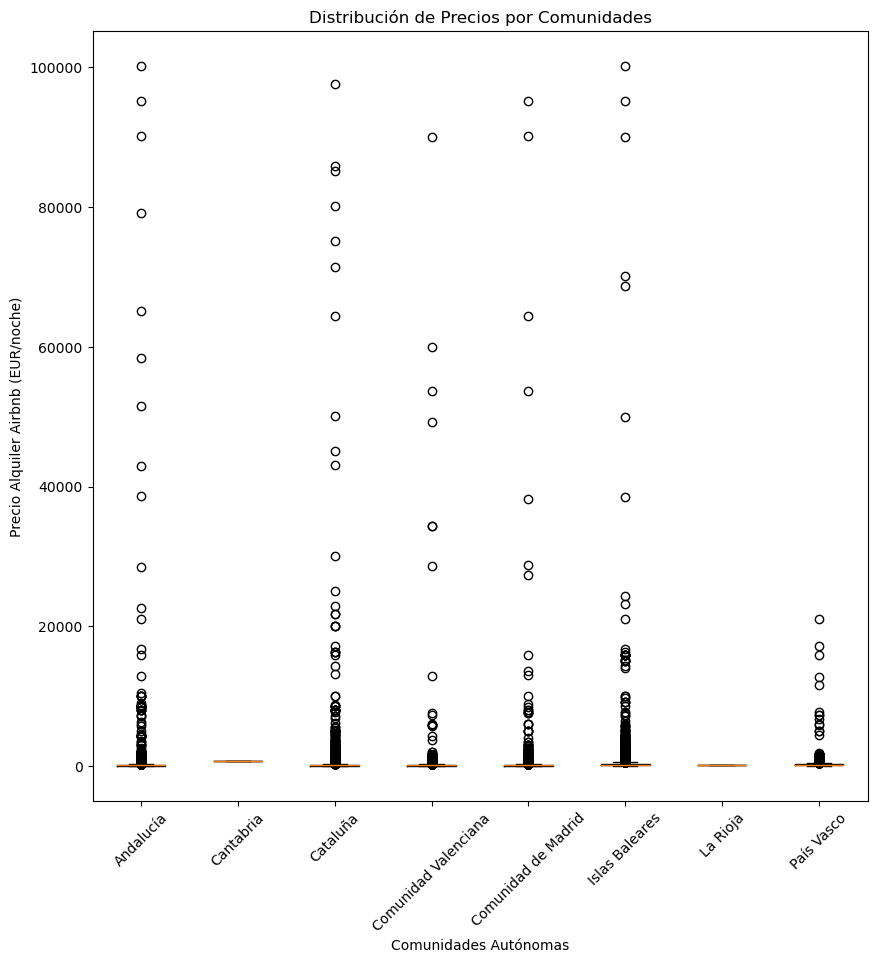

In [299]:
# Group the 'price' column by 'state'
grouped_data = entire_unit.groupby('state')['price']

# Convert the grouped data to a list of lists
data_to_plot = [grouped_data.get_group(state) for state in grouped_data.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot)
plt.xticks(range(1, len(grouped_data.groups) + 1), grouped_data.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche)')
plt.title('Distribución de Precios por Comunidades')
plt.show()

In [300]:
entire_unit[entire_unit["price"] >= 1000]

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,availability_365,number_of_reviews_ltm,license,latitude,longitude,location_geo,state,province,municipality,zip_code
69,97529,Furnished one bedroom apartment with bathroom,497450,Francesc,Entire home/apt,4044,120,67,2022-10-31,0.500000,...,224,2,No License,41.408791,2.166066,"455, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
880,1756975,CHIC & CHEAP ;),8965423,Nacho,Entire home/apt,13219,3,195,2022-12-09,1.750000,...,34,45,HUTB-011406,41.430170,2.181560,"CeX, 123, Passeig de Fabra i Puig, Vilapicina ...",Cataluña,Barcelona,Barcelona,8042
1482,4200509,Villa Victoria Barcelona - Luxury Villa with P...,21793560,Imanol,Entire home/apt,1344,1,25,2022-11-15,0.260000,...,344,4,HUTB-001101,41.427330,2.165660,"Passeig de la Font d'en Fargas, la Font d'en F...",Cataluña,Barcelona,Barcelona,8001
1869,6666212,Diagonal Mar apartments,5729069,Barcelona,Entire home/apt,1300,3,1,2019-06-03,0.020000,...,358,0,No License,41.402050,2.209690,"138, Passeig del Taulat, Diagonal Mar i el Fro...",Cataluña,Barcelona,Barcelona,8005
1870,6666350,FRONT BEACH Apartments,5729069,Barcelona,Entire home/apt,1200,3,6,2018-10-09,0.070000,...,361,0,HUTB-011466,41.401970,2.209630,"138, Passeig del Taulat, Diagonal Mar i el Fro...",Cataluña,Barcelona,Barcelona,8005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101636,650786723375503141,Olala Valencia Loft 4,129000409,Olala Homes,Entire home/apt,5880,1,1,2022-11-18,0.880000,...,88,1,No License,39.456020,-0.392170,"8, Carrer de Vicente Parra Actor, Favara, Patr...",Comunidad Valenciana,Valencia,Valencia,46017
101905,672347760765114665,A luxurious place to relax,440990692,Pedro,Entire home/apt,1500,1,0,No Review,1.193967,...,154,0,No License,39.465000,-0.401500,"Carrer de Llombai, Tres Forques, l'Olivereta, ...",Comunidad Valenciana,Valencia,Xirivella,46014
102507,749168899711863476,Alex- duplex loft -city,125741320,Alejandro,Entire home/apt,1000,1,0,No Review,1.193967,...,0,0,No License,39.466730,-0.347730,"Carrer del Marí Albesa, Aiora, Camins al Grau,...",Comunidad Valenciana,Valencia,Valencia,46023
102597,740217713238368612,Gran apartamento cerca del Ave y metro,806645,Maria Jesus,Entire home/apt,6075,14,0,No Review,1.193967,...,330,0,No License,39.456560,-0.386030,"18, Carrer de Dolores Alcaide, la Raïosa, Jesú...",Comunidad Valenciana,Valencia,Valencia,46007


- En el conjunto de datos de arriba, hay 2180 filas o alojamientos cuyo precios de alquiler son más de 1000 euros por noche que me parecen raros.
- Vamos a mirar otro conjunto de datos que se llama "rating_es", aunque sólo contiene 900 registros pero tiene más columnas para poder analizar mejor (por ej: columnas sobre número de dormitorios, capacidad de alojamiento, número de reseñas, rating, etc). Estos 900 registros son parte de los 102.800 registros que hay en el dataset principal ("listing_address_es")


In [301]:
rating_es = pd.read_csv("data/rating_es.csv", encoding="utf-8")
rating_es.head()

,Unnamed: 0,id,name,description,neighborhood_overview,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,0,18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,71615,within an hour,100%,94%,f,...,1125,33,4.31,4.41,4.63,4.78,4.69,4.81,4.28,t
1,1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Double room at El Born / MONTHLY RENTAL & DAY...,NaN,548084,within a day,60%,43%,f,...,365,79,4.56,4.14,4.61,4.87,4.88,4.95,4.49,f
2,2,128463,Private Suite in residential area!!,My House is located in the quiet district of S...,You live in a typical Spanish district with no...,635253,within an hour,100%,100%,t,...,1125,347,4.87,4.91,4.94,4.94,4.90,4.73,4.82,t
3,3,130227,Spacious Room with Pool and Terrace,Just 5 minutes’ walk from the beach in the San...,NaN,641496,NaN,NaN,100%,f,...,31,130,4.72,4.84,4.92,4.88,4.78,4.73,4.64,f
4,4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,AMAZING APARTMENT AT RAMBLA OF POBLE NOU ; ONL...,NaN,664196,within an hour,83%,18%,f,...,365,131,4.64,4.74,4.68,4.69,4.80,4.83,4.56,f


In [302]:
rating_es = rating_es.drop("Unnamed: 0", axis=1)
rating_es.head()

,id,name,description,neighborhood_overview,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,18674,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,71615,within an hour,100%,94%,f,t,...,1125,33,4.31,4.41,4.63,4.78,4.69,4.81,4.28,t
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Double room at El Born / MONTHLY RENTAL & DAY...,NaN,548084,within a day,60%,43%,f,t,...,365,79,4.56,4.14,4.61,4.87,4.88,4.95,4.49,f
2,128463,Private Suite in residential area!!,My House is located in the quiet district of S...,You live in a typical Spanish district with no...,635253,within an hour,100%,100%,t,t,...,1125,347,4.87,4.91,4.94,4.94,4.90,4.73,4.82,t
3,130227,Spacious Room with Pool and Terrace,Just 5 minutes’ walk from the beach in the San...,NaN,641496,NaN,NaN,100%,f,t,...,31,130,4.72,4.84,4.92,4.88,4.78,4.73,4.64,f
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,AMAZING APARTMENT AT RAMBLA OF POBLE NOU ; ONL...,NaN,664196,within an hour,83%,18%,f,t,...,365,131,4.64,4.74,4.68,4.69,4.80,4.83,4.56,f


In [303]:
rating_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           900 non-null    int64  
 1   name                         900 non-null    object 
 2   description                  900 non-null    object 
 3   neighborhood_overview        552 non-null    object 
 4   host_id                      900 non-null    int64  
 5   host_response_time           763 non-null    object 
 6   host_response_rate           763 non-null    object 
 7   host_acceptance_rate         849 non-null    object 
 8   host_is_superhost            900 non-null    object 
 9   host_has_profile_pic         900 non-null    object 
 10  host_identity_verified       900 non-null    object 
 11  property_type                900 non-null    object 
 12  room_type                    900 non-null    object 
 13  accommodates        

In [304]:
rating_es.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [305]:
pricing_es = rating_es[['id', 'name','property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating']]
pricing_es.head()

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating
0,18674,Huge flat for 8 people close to Sagrada Familia,Entire rental unit,Entire home/apt,8,3.0,6.0,$129.00,1,33,4.31
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Private room in rental unit,Private room,2,1.0,1.0,$60.00,3,79,4.56
2,128463,Private Suite in residential area!!,Private room in rental unit,Private room,2,1.0,1.0,$60.00,3,347,4.87
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,$80.00,31,130,4.72
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,$90.00,90,131,4.64


In [306]:
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    900 non-null    int64  
 1   name                  900 non-null    object 
 2   property_type         900 non-null    object 
 3   room_type             900 non-null    object 
 4   accommodates          900 non-null    int64  
 5   bedrooms              869 non-null    float64
 6   beds                  897 non-null    float64
 7   price                 900 non-null    object 
 8   minimum_nights        900 non-null    int64  
 9   number_of_reviews     900 non-null    int64  
 10  review_scores_rating  871 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 77.5+ KB


In [307]:
# Juntamos este conjunto de datos con él que tiene información de comunidades, provincias y municipios

pricing_es = pd.merge(pricing_es, final_address, on="id", how="left")
pricing_es.head()

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipio_nombre,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,Entire rental unit,Entire home/apt,8,3.0,6.0,$129.00,1,33,4.31,41.405560,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Private room in rental unit,Private room,2,1.0,1.0,$60.00,3,79,4.56,41.382481,2.18115,"2, Carrer de Joan Massana, la Ribera, Sant Per...",Cataluña,Barcelona,Barcelona,8003
2,128463,Private Suite in residential area!!,Private room in rental unit,Private room,2,1.0,1.0,$60.00,3,347,4.87,41.371550,2.13664,"Carrer de la Noguera Pallaresa, Sants, Sants-M...",Cataluña,Barcelona,Barcelona,8001
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,$80.00,31,130,4.72,41.407790,2.21146,"317, Carrer de Llull, el Besòs i el Maresme, S...",Cataluña,Barcelona,Barcelona,8001
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,$90.00,90,131,4.64,41.397870,2.20429,"3, Passatge d'Aymà, el Poblenou, Sant Martí, B...",Cataluña,Barcelona,Barcelona,8005


In [308]:
# Comprobamos los valores NaNs

pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    900 non-null    int64  
 1   name                  900 non-null    object 
 2   property_type         900 non-null    object 
 3   room_type             900 non-null    object 
 4   accommodates          900 non-null    int64  
 5   bedrooms              869 non-null    float64
 6   beds                  897 non-null    float64
 7   price                 900 non-null    object 
 8   minimum_nights        900 non-null    int64  
 9   number_of_reviews     900 non-null    int64  
 10  review_scores_rating  871 non-null    float64
 11  latitude              900 non-null    float64
 12  longitude             900 non-null    float64
 13  location_geo          900 non-null    object 
 14  state                 900 non-null    object 
 15  province              9

In [309]:
pricing_es["bedrooms"].unique()

array([ 3.,  1.,  2.,  4., nan,  6.,  8.,  5.,  9.,  7., 11.])

In [310]:
pricing_es["bedrooms"].mean()

2.047180667433832

In [311]:
pricing_es["beds"].unique()

array([ 6.,  1.,  3.,  4.,  2.,  7.,  5., 14.,  8., 18.,  9., 12., 11.,
       17., 21., 15., nan, 10., 13., 16., 20.])

In [312]:
pricing_es["beds"].mean()

3.2073578595317724

In [313]:
pricing_es["review_scores_rating"].mean()

4.605912743972445

In [314]:
# Vamos a sustituir los NaNs con los valores medios

pricing_es["bedrooms"].fillna((round(pricing_es["bedrooms"].mean())), inplace=True)
pricing_es["beds"].fillna((round(pricing_es["beds"].mean())), inplace=True)
pricing_es["review_scores_rating"].fillna((pricing_es["bedrooms"].mean()), inplace=True)
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    900 non-null    int64  
 1   name                  900 non-null    object 
 2   property_type         900 non-null    object 
 3   room_type             900 non-null    object 
 4   accommodates          900 non-null    int64  
 5   bedrooms              900 non-null    float64
 6   beds                  900 non-null    float64
 7   price                 900 non-null    object 
 8   minimum_nights        900 non-null    int64  
 9   number_of_reviews     900 non-null    int64  
 10  review_scores_rating  900 non-null    float64
 11  latitude              900 non-null    float64
 12  longitude             900 non-null    float64
 13  location_geo          900 non-null    object 
 14  state                 900 non-null    object 
 15  province              9

In [315]:
pricing_es["bedrooms"].mean() # El valor medio se ha cambiado un poco porque hemos rellenado los NaNs

2.0455555555555556

In [316]:
pricing_es["beds"].mean() # El valor medio se ha cambiado un poco porque hemos rellenado los NaNs

3.2066666666666666

In [317]:
pricing_es = pricing_es.rename({"municipio_nombre": "municipality"}, axis=1)
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    900 non-null    int64  
 1   name                  900 non-null    object 
 2   property_type         900 non-null    object 
 3   room_type             900 non-null    object 
 4   accommodates          900 non-null    int64  
 5   bedrooms              900 non-null    float64
 6   beds                  900 non-null    float64
 7   price                 900 non-null    object 
 8   minimum_nights        900 non-null    int64  
 9   number_of_reviews     900 non-null    int64  
 10  review_scores_rating  900 non-null    float64
 11  latitude              900 non-null    float64
 12  longitude             900 non-null    float64
 13  location_geo          900 non-null    object 
 14  state                 900 non-null    object 
 15  province              9

In [318]:
pricing_es["property_type"].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in condo', 'Entire loft',
       'Entire serviced apartment', 'Entire home', 'Entire condo',
       'Private room in home', 'Room in hotel', 'Entire villa',
       'Private room in villa', 'Private room in townhouse',
       'Private room in cottage', 'Entire guesthouse', 'Entire cottage',
       'Private room in bed and breakfast', 'Private room in hostel',
       'Entire cabin', 'Private room in loft', 'Farm stay',
       'Entire townhouse', 'Shared room in rental unit',
       'Private room in casa particular', 'Private room in guest suite',
       'Private room in chalet', 'Entire bungalow', 'Castle',
       'Entire place', 'Room in boutique hotel', 'Camper/RV',
       'Entire chalet', 'Boat', 'Private room in guesthouse',
       'Private room in tiny home', 'Tiny home'], dtype=object)

In [319]:
pricing_es[pricing_es["property_type"] == "Castle"]

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
515,255161,RURAL HOUSE BALITX D'AVALL,Castle,Entire home/apt,15,7.0,15.0,$650.00,3,1,5.0,39.81619,2.74088,"Bàlitx d‘Avall, Kati Heid, Sóller, Serra de Tr...",Islas Baleares,Mallorca,Fornalutx,7109


In [320]:
pricing_es["accommodates"].unique()

array([ 8,  2,  5,  1,  6,  4,  3,  9, 12,  7, 10, 16, 13, 15, 11],
      dtype=int64)

In [321]:
pricing_es["bedrooms"].unique()

array([ 3.,  1.,  2.,  4.,  6.,  8.,  5.,  9.,  7., 11.])

In [322]:
pricing_es["beds"].unique()

array([ 6.,  1.,  3.,  4.,  2.,  7.,  5., 14.,  8., 18.,  9., 12., 11.,
       17., 21., 15., 10., 13., 16., 20.])

In [323]:
pricing_es["price"].unique()

array(['$129.00', '$60.00', '$80.00', '$90.00', '$195.00', '$40.00',
       '$73.00', '$74.00', '$309.00', '$44.00', '$174.00', '$36.00',
       '$18.00', '$121.00', '$32.00', '$38.00', '$149.00', '$103.00',
       '$124.00', '$138.00', '$115.00', '$290.00', '$200.00', '$23.00',
       '$250.00', '$292.00', '$46.00', '$98.00', '$180.00', '$287.00',
       '$63.00', '$123.00', '$62.00', '$55.00', '$28.00', '$154.00',
       '$85.00', '$70.00', '$91.00', '$79.00', '$155.00', '$29.00',
       '$112.00', '$150.00', '$132.00', '$82.00', '$264.00', '$95.00',
       '$22.00', '$265.00', '$94.00', '$27.00', '$101.00', '$75.00',
       '$175.00', '$105.00', '$127.00', '$509.00', '$49.00', '$151.00',
       '$34.00', '$45.00', '$120.00', '$4,044.00', '$163.00', '$106.00',
       '$285.00', '$358.00', '$104.00', '$100.00', '$81.00', '$33.00',
       '$226.00', '$179.00', '$119.00', '$190.00', '$93.00', '$109.00',
       '$183.00', '$144.00', '$275.00', '$999.00', '$126.00', '$68.00',
       '$650

In [324]:
# Cambiamos el Dtype de la columna "price" a float

def change_dtype(row):
    price = row["price"].replace(",", "").split("$")[-1]
    price = float(price)
    return price

pricing_es["price"] = pricing_es.apply(change_dtype, axis=1)
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    900 non-null    int64  
 1   name                  900 non-null    object 
 2   property_type         900 non-null    object 
 3   room_type             900 non-null    object 
 4   accommodates          900 non-null    int64  
 5   bedrooms              900 non-null    float64
 6   beds                  900 non-null    float64
 7   price                 900 non-null    float64
 8   minimum_nights        900 non-null    int64  
 9   number_of_reviews     900 non-null    int64  
 10  review_scores_rating  900 non-null    float64
 11  latitude              900 non-null    float64
 12  longitude             900 non-null    float64
 13  location_geo          900 non-null    object 
 14  state                 900 non-null    object 
 15  province              9

In [325]:
pricing_es.groupby(["state", "room_type"])[["price"]].describe()

price                                 \
                                      count        mean         std    min   
state                room_type                                               
Andalucía            Entire home/apt  170.0  104.652941   76.697073   30.0   
                     Private room      29.0   67.034483  157.984286   19.0   
                     Shared room        1.0   39.000000         NaN   39.0   
Cataluña             Entire home/apt  170.0  188.723529  344.952359   27.0   
                     Private room      30.0   55.533333   35.497191   18.0   
Comunidad Valenciana Entire home/apt   80.0  119.312500  131.584078   42.0   
                     Private room      20.0   87.700000  177.606039   18.0   
Comunidad de Madrid  Entire home/apt   67.0   97.552239   40.639689   35.0   
                     Private room      32.0   44.031250   24.487633   15.0   
                     Shared room        1.0   70.000000         NaN   70.0   
Islas Baleares       Entire home/apt  179.0  188.687151  158.753050   32.0   
                     Hotel room         2.0  136.000000   39.597980  108.0   
                     Private room      19.0   49.473684   24.212872   30.0   
País Vasco           Entire home/apt   68.0  187.220588  118.768161   66.0   
                     Private room      32.0   97.718750  175.524511   27.0   

                                                                     
                                         25%    50%     75%     max  
state                room_type                                       
Andalucía            Entire home/apt   67.00   89.0  121.50   874.0  
                     Private room      29.00   34.0   42.00   884.0  
                     Shared room       39.00   39.0   39.00    39.0  
Cataluña             Entire home/apt   80.25  114.0  178.75  4044.0  
                     Private room      36.50   45.5   60.00   200.0  
Comunidad Valenciana Entire home/apt   75.00   95.5  121.25  1200.0  
                     Private room      29.50   35.0   64.75   829.0  
Comunidad de Madrid  Entire home/apt   73.50   93.0  109.00   286.0  
                     Private room      30.00   35.0   52.50   123.0  
                     Shared room       70.00   70.0   70.00    70.0  
Islas Baleares       Entire home/apt   95.00  135.0  238.00  1260.0  
                     Hotel room       122.00  136.0  150.00   164.0  
                     Private room      31.00   39.0   60.00   103.0  
País Vasco           Entire home/apt  106.75  152.0  246.00   650.0  
                     Private room      43.75   53.5   75.00   999.0

In [326]:
pricing_es.to_csv("dashboard/airbnb_pricing_es.csv", encoding="utf-8")

Comprobamos los valores atípicos - Room Type: Entire home/apt

In [327]:
pricing_es[(pricing_es["room_type"] == "Entire home/apt") & (pricing_es["price"] > 500)]

# Parece que la columna "price" se refiere al precio total, contando el mínimo de noches.
# Por lo tanto, hay que calcularlo así --> Price per night = price / minimum_nights

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
74,425639,House with garden,Entire home,Entire home/apt,8,4.0,5.0,509.0,2,78,4.77,41.408640,2.145570,"Carrer de Ferran Puig, el Putget, el Putget i ...",Cataluña,Barcelona,Barcelona,8001
84,97529,Furnished one bedroom apartment with bathroom,Entire rental unit,Entire home/apt,2,1.0,1.0,4044.0,120,67,4.74,41.408791,2.166066,"455, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
122,2904588,MAGNIFICENT VILLA BEACHFRONT WIFI SAN SEBASTIAN,Entire villa,Entire home/apt,12,6.0,8.0,650.0,3,52,4.96,43.300500,-2.201700,"N-634, Getaria, Urola-Kosta, Gipuzkoa, Euskadi...",País Vasco,Gipuzkoa,Getaria,20808
178,3384406,"Azkorri Beach House (Getxo, Bilbao)",Entire cottage,Entire home/apt,16,8.0,18.0,630.0,2,29,4.82,43.374250,-3.014490,"Barrio Goienetxe, Elexalde, Getxo, Andraka, Bi...",País Vasco,Bizkaia,Getxo,48993
211,101580,"Villa ZEN costa brava ,700m port,beach & resta...",Entire villa,Entire home/apt,16,4.0,12.0,1571.0,5,22,4.82,41.706560,2.890150,"Cami de Ronda, Font de Sant Llorenç, Canyelles...",Cataluña,Girona,Lloret de Mar,17310
222,121962,Amplia masia cerca del mar,Farm stay,Entire home/apt,16,6.0,11.0,676.0,2,25,4.67,41.841040,2.948110,Antic Camí Ral de Girona a Sant Feliu de Guíxo...,Cataluña,Girona,Llagostera,17240
274,323402,"Villa Fluvia: 1200m city, swimming pool, sea view",Entire home,Entire home/apt,16,9.0,17.0,1030.0,2,8,4.13,41.712550,2.855710,"Carrer de Santiago Rusiñol, Serra Brava, Llore...",Cataluña,Girona,Lloret de Mar,17310
290,891269,S. XII Can Ribes Lago de Banyoles PG-00...,Entire cottage,Entire home/apt,16,7.0,21.0,593.0,2,41,4.78,42.071920,2.786140,"Carretera de Camós, Palol de Revardit, Pla de ...",Cataluña,Girona,Palol de Revardit,17843
294,1307043,BEAUTIFUL FARMHOUSE 10 MIN. GIRONA,Entire home,Entire home/apt,16,6.0,15.0,850.0,2,37,4.94,41.958510,2.764330,"Corriol del Mas Moner, Vilablareix, Gironès, G...",Cataluña,Girona,Vilablareix,17180
515,255161,RURAL HOUSE BALITX D'AVALL,Castle,Entire home/apt,15,7.0,15.0,650.0,3,1,5.00,39.816190,2.740880,"Bàlitx d‘Avall, Kati Heid, Sóller, Serra de Tr...",Islas Baleares,Mallorca,Fornalutx,7109


Comprobamos los valores atípicos - Room Type: Private room, Shared room, Hotel room

In [328]:
pricing_es[(pricing_es["room_type"] != "Entire home/apt") & (pricing_es["price"] > 200)]

# Parece que la columna "price" se refiere al precio total, contando el mínimo de noches.
# Por lo tanto, hay que calcularlo así --> Price per night = price / minimum_nights

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
119,2886611,Huge room in the center of Bilbao,Private room in rental unit,Private room,3,1.0,2.0,999.0,3,8,4.000000,43.27198,-2.94716,"26, Avenida Lehendakari Aguirre / Agirre lehen...",País Vasco,Bizkaia,Bilbao,48014
182,3448863,Casa A Compartir En Zona Tranquila,Private room in home,Private room,1,1.0,1.0,380.0,30,0,2.045556,43.28724,-1.99865,"Atotxaerreka, Añorga, Donostia - San Sebastián...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20018
735,462899,Room+priv. bath Center of Seville!,Private room in rental unit,Private room,2,1.0,1.0,884.0,1,417,4.880000,37.39371,-5.98866,"Hotel Don Pedro, Calle Gerona, Encarnación-Reg...",Andalucía,Sevilla,Sevilla,41003
852,2690646,Bedroom of a Pop Star,Private room in rental unit,Private room,2,1.0,2.0,829.0,2,19,4.330000,39.46296,-0.36634,"8, Carrer del Duc de Calàbria, Russafa, l'Eixa...",Comunidad Valenciana,Valencia,Valencia,46005


Contamos el precio por noche

In [329]:
def get_price_night(row):
    price = row["price"] / row["minimum_nights"]
    return price

In [330]:
pricing_es.insert(9, "price per night", pricing_es.apply(get_price_night, axis=1))

In [331]:
pricing_es.head()

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,Entire rental unit,Entire home/apt,8,3.0,6.0,129.0,1,129.000000,33,4.31,41.405560,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,79,4.56,41.382481,2.18115,"2, Carrer de Joan Massana, la Ribera, Sant Per...",Cataluña,Barcelona,Barcelona,8003
2,128463,Private Suite in residential area!!,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,347,4.87,41.371550,2.13664,"Carrer de la Noguera Pallaresa, Sants, Sants-M...",Cataluña,Barcelona,Barcelona,8001
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,80.0,31,2.580645,130,4.72,41.407790,2.21146,"317, Carrer de Llull, el Besòs i el Maresme, S...",Cataluña,Barcelona,Barcelona,8001
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,90.0,90,1.000000,131,4.64,41.397870,2.20429,"3, Passatge d'Aymà, el Poblenou, Sant Martí, B...",Cataluña,Barcelona,Barcelona,8005


Comprobamos si todavía hay muchos valores atípicos o no en la columna "price per night" - Room Type: Entire home/apt

In [332]:
pricing_es[(pricing_es["room_type"] == "Entire home/apt") & (pricing_es["price per night"] > 500)]

# Estos valores atípicos son normales porque estos alojamientos tienen muchos dormitorios
# Por lo tanto, hay que calcularlo así --> Price per night per bedroom = price per night / bedrooms

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
274,323402,"Villa Fluvia: 1200m city, swimming pool, sea view",Entire home,Entire home/apt,16,9.0,17.0,1030.0,2,515.0,8,4.13,41.71255,2.85571,"Carrer de Santiago Rusiñol, Serra Brava, Llore...",Cataluña,Girona,Lloret de Mar,17310
771,692388,Rooms for groups in the centre-WIFI,Entire home,Entire home/apt,16,6.0,16.0,874.0,1,874.0,24,4.38,37.37229,-5.98297,"17, Calle Felipe II, El Porvenir, Distrito Sur...",Andalucía,Sevilla,Sevilla,41013
873,3275634,Palacete en el centro de Valencia!!,Entire home,Entire home/apt,15,6.0,10.0,1200.0,1,1200.0,3,3.67,39.47704,-0.38262,"Carrer de Pinzón, el Carme, Ciutat Vella, Valè...",Comunidad Valenciana,Valencia,Valencia,46001


Comprobamos si todavía hay muchos valores atípicos o no en la columna "price per night" - Room Type: Private room, Shared room, Hotel room

In [333]:
pricing_es[(pricing_es["room_type"] != "Entire home/apt") & (pricing_es["price per night"] > 200)]

# Estos valores atípicos son normales porque son dormitorios grandes, menos él de la fila 735. Por ahora, lo dejamos así.
# Por lo tanto, hay que calcularlo así --> Price per night per bedroom = price per night / bedrooms

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
119,2886611,Huge room in the center of Bilbao,Private room in rental unit,Private room,3,1.0,2.0,999.0,3,333.0,8,4.00,43.27198,-2.94716,"26, Avenida Lehendakari Aguirre / Agirre lehen...",País Vasco,Bizkaia,Bilbao,48014
735,462899,Room+priv. bath Center of Seville!,Private room in rental unit,Private room,2,1.0,1.0,884.0,1,884.0,417,4.88,37.39371,-5.98866,"Hotel Don Pedro, Calle Gerona, Encarnación-Reg...",Andalucía,Sevilla,Sevilla,41003
852,2690646,Bedroom of a Pop Star,Private room in rental unit,Private room,2,1.0,2.0,829.0,2,414.5,19,4.33,39.46296,-0.36634,"8, Carrer del Duc de Calàbria, Russafa, l'Eixa...",Comunidad Valenciana,Valencia,Valencia,46005


Contamos el precio por noche por dormitorio

In [334]:
def get_price_night_bedroom(row):
    price = row["price per night"] / row["bedrooms"]
    return price

In [335]:
pricing_es.insert(10, "price per night per bedroom", pricing_es.apply(get_price_night_bedroom, axis=1))

In [336]:
pricing_es.head()

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,Entire rental unit,Entire home/apt,8,3.0,6.0,129.0,1,129.000000,43.000000,33,4.31,41.405560,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,20.000000,79,4.56,41.382481,2.18115,"2, Carrer de Joan Massana, la Ribera, Sant Per...",Cataluña,Barcelona,Barcelona,8003
2,128463,Private Suite in residential area!!,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,20.000000,347,4.87,41.371550,2.13664,"Carrer de la Noguera Pallaresa, Sants, Sants-M...",Cataluña,Barcelona,Barcelona,8001
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,80.0,31,2.580645,0.860215,130,4.72,41.407790,2.21146,"317, Carrer de Llull, el Besòs i el Maresme, S...",Cataluña,Barcelona,Barcelona,8001
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,90.0,90,1.000000,0.500000,131,4.64,41.397870,2.20429,"3, Passatge d'Aymà, el Poblenou, Sant Martí, B...",Cataluña,Barcelona,Barcelona,8005


In [337]:
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           900 non-null    int64  
 1   name                         900 non-null    object 
 2   property_type                900 non-null    object 
 3   room_type                    900 non-null    object 
 4   accommodates                 900 non-null    int64  
 5   bedrooms                     900 non-null    float64
 6   beds                         900 non-null    float64
 7   price                        900 non-null    float64
 8   minimum_nights               900 non-null    int64  
 9   price per night              900 non-null    float64
 10  price per night per bedroom  900 non-null    float64
 11  number_of_reviews            900 non-null    int64  
 12  review_scores_rating         900 non-null    float64
 13  latitude            

In [338]:
pricing_es.to_csv("dashboard/airbnb_pricing_es.csv", encoding="utf-8")

Comprobamos los valores atípicos del precio por noche por dormitorio. En este paso, NO hace falta comprobar por separado entre "Entire home/apt" y "Private room, Shared room, Hotel room". Suponemos que el precio más caro sería 200 EUR/noche/dormitorio (como el precio de un hotel de 3-4 estrellas)

In [339]:
pricing_es[pricing_es["price per night per bedroom"] > 200]

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
119,2886611,Huge room in the center of Bilbao,Private room in rental unit,Private room,3,1.0,2.0,999.0,3,333.0,333.0,8,4.00,43.27198,-2.94716,"26, Avenida Lehendakari Aguirre / Agirre lehen...",País Vasco,Bizkaia,Bilbao,48014
133,3222611,"Niza | La Concha, WiFi",Entire rental unit,Entire home/apt,2,1.0,2.0,225.0,1,225.0,225.0,125,4.61,43.31945,-1.98041,"12, San Martzial kalea, Gune Erromantikoa, Par...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20005
137,3245758,"Vaumm | Central, WiFi",Entire rental unit,Entire home/apt,2,1.0,2.0,207.0,1,207.0,207.0,36,4.69,43.31893,-1.97966,"3, Arrasate kalea, Gune Erromantikoa, Parte Za...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20005
172,3251911,"Prim | Central, WiFi",Entire rental unit,Entire home/apt,2,1.0,1.0,207.0,1,207.0,207.0,34,4.47,43.31398,-1.97944,"Gernikako Arbola, Gernikako arbolaren Pasealek...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20006
735,462899,Room+priv. bath Center of Seville!,Private room in rental unit,Private room,2,1.0,1.0,884.0,1,884.0,884.0,417,4.88,37.39371,-5.98866,"Hotel Don Pedro, Calle Gerona, Encarnación-Reg...",Andalucía,Sevilla,Sevilla,41003
852,2690646,Bedroom of a Pop Star,Private room in rental unit,Private room,2,1.0,2.0,829.0,2,414.5,414.5,19,4.33,39.46296,-0.36634,"8, Carrer del Duc de Calàbria, Russafa, l'Eixa...",Comunidad Valenciana,Valencia,Valencia,46005


Comprobamos los valores atípicos que son menos de 20 EUR/noche/dormitorio. Suponemos que el precio mínimo sería 20 EUR/noche/dormitorio.

In [340]:
pricing_es[pricing_es["price per night per bedroom"] < 20]

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,80.0,31,2.580645,0.860215,130,4.720000,41.40779,2.21146,"317, Carrer de Llull, el Besòs i el Maresme, S...",Cataluña,Barcelona,Barcelona,8001
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,90.0,90,1.000000,0.500000,131,4.640000,41.39787,2.20429,"3, Passatge d'Aymà, el Poblenou, Sant Martí, B...",Cataluña,Barcelona,Barcelona,8005
5,23197,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas",Entire rental unit,Entire home/apt,5,3.0,4.0,195.0,4,48.750000,16.250000,65,4.750000,41.41243,2.21975,"Diagonal Zero Zero, 6, Rambla de Prim, el Besò...",Cataluña,Barcelona,Barcelona,8019
6,136670,"double Room -UPC, ESADE, Barça, Real Club Tennis",Private room in rental unit,Private room,1,1.0,1.0,40.0,32,1.250000,1.250000,130,4.590000,41.38832,2.12201,"Col·legi Major Universitari Bonaigua, Carrer d...",Cataluña,Barcelona,Barcelona,8001
7,32711,Sagrada Familia area - Còrsega 1,Entire rental unit,Entire home/apt,6,2.0,3.0,73.0,2,36.500000,18.250000,83,4.400000,41.40566,2.17015,"365, Carrer de Sardenya, el Camp d'en Grassot ...",Cataluña,Barcelona,Barcelona,8001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,3550616,Wide & luminous apartment with breakfast,Entire rental unit,Entire home/apt,8,3.0,5.0,94.0,2,47.000000,15.666667,12,4.750000,39.44965,-0.37360,"Carrer d'Aielo de Malferit, Malilla, Quatre Ca...",Comunidad Valenciana,Valencia,Valencia,46026
888,3567941,"casa con encanto,en el centro",Entire rental unit,Entire home/apt,2,2.0,1.0,125.0,15,8.333333,4.166667,0,2.045556,39.46112,-0.37481,"41, Carrer de Sueca, Russafa, l'Eixample, Valè...",Comunidad Valenciana,Valencia,Valencia,46006
895,3675253,ESTUDIO EN CENTRO HISTÓRICO Free Cov. OZONO,Entire rental unit,Entire home/apt,2,2.0,1.0,75.0,2,37.500000,18.750000,285,4.520000,39.47567,-0.37773,"Dempanadas, 2, Carrer de Calatrava, la Seu, Ci...",Comunidad Valenciana,Valencia,Valencia,46003
897,3719698,Two bedroom flat; centre of Russafa,Entire rental unit,Entire home/apt,6,2.0,4.0,95.0,3,31.666667,15.833333,6,4.670000,39.46175,-0.37140,"Mercat de Russafa, 30, Plaça del Baró de Corte...",Comunidad Valenciana,Valencia,Valencia,46006


Resultados:
- Hay 464 filas con los precios < 20 EUR/noche/dormitorio
- Hay algunos que tienen precios 1-5 EUR/noche/dormitorio por lo cual no tiene sentido

Siguiente paso:
- Para estas 464 filas, sutituimos los valores de la columna "price per night per bedroom" con la columna "price per night" o con la columna "price"

In [341]:
def replace_price_night_bedroom(row):
    if row["price per night per bedroom"] < 20:
        if row["price per night"] < 20:
            row["price per night per bedroom"] = row["price"]
        else:
            row["price per night per bedroom"] = row["price per night"]
    return row

In [342]:
pricing_es = pricing_es.apply(replace_price_night_bedroom, axis=1)

Comprobamos otra vez los valores atípicos en la columna "price per night per bedroom" que son < 20

In [343]:
pricing_es[pricing_es["price per night per bedroom"] < 20]

# Los precios por noche por dormitorio parecen correctos. Así, los dejamos.

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
15,147275,1 Room INDIVIDUAL in Barcelona,Private room in rental unit,Private room,1,1.0,1.0,18.0,31,0.580645,18.0,126,4.240000,41.42337,2.17490,"Casa de Isabel, Avinguda de la Mare de Déu de ...",Cataluña,Barcelona,Barcelona,8001
355,460898,Wide and nice apartment in Madrid,Private room in rental unit,Private room,2,3.0,3.0,15.0,30,0.500000,15.0,0,2.045556,40.48503,-3.69858,"20, Calle de Santiago de Compostela, La Paz, F...",Comunidad de Madrid,Madrid,Madrid,28029
401,166473,Perfect Location In Malaga,Private room in rental unit,Private room,1,1.0,4.0,19.0,5,3.800000,19.0,88,4.730000,36.71934,-4.35942,"80, Avenida Salvador Allende, Playas del Palo,...",Andalucía,Málaga,Málaga,29017
405,1966333,Perfect Location in Malaga Part 2,Private room in rental unit,Private room,1,1.0,4.0,19.0,5,3.800000,19.0,34,4.530000,36.72054,-4.36006,"14, Calle Miguel Moya, El Palo, Este, Málaga, ...",Andalucía,Málaga,Málaga,29017
412,2145149,Perfect Location in Malaga Part 3,Private room in rental unit,Private room,1,1.0,4.0,19.0,5,3.800000,19.0,41,4.680000,36.72081,-4.36109,"El Palo, Calle Miguel Moya, El Palo, Este, Mál...",Andalucía,Málaga,Málaga,29017
808,1658018,Single Room 1 Valencia Beach,Private room in rental unit,Private room,1,1.0,1.0,18.0,3,6.000000,18.0,105,4.750000,39.46878,-0.33275,"17, Carrer de Martí Grajales, Canyamelar, el C...",Comunidad Valenciana,Valencia,Valencia,46011


In [344]:
pricing_es[pricing_es["price per night per bedroom"] < 20]["id"].nunique()

6

Comprobamos otra vez los valores atípicos en la columna "price per night per bedroom" que son > 200 EUR/noche/dormitorio

In [345]:
pricing_es[pricing_es["price per night per bedroom"] > 200]

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
119,2886611,Huge room in the center of Bilbao,Private room in rental unit,Private room,3,1.0,2.0,999.0,3,333.000000,333.0,8,4.000000,43.27198,-2.94716,"26, Avenida Lehendakari Aguirre / Agirre lehen...",País Vasco,Bizkaia,Bilbao,48014
133,3222611,"Niza | La Concha, WiFi",Entire rental unit,Entire home/apt,2,1.0,2.0,225.0,1,225.000000,225.0,125,4.610000,43.31945,-1.98041,"12, San Martzial kalea, Gune Erromantikoa, Par...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20005
137,3245758,"Vaumm | Central, WiFi",Entire rental unit,Entire home/apt,2,1.0,2.0,207.0,1,207.000000,207.0,36,4.690000,43.31893,-1.97966,"3, Arrasate kalea, Gune Erromantikoa, Parte Za...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20005
172,3251911,"Prim | Central, WiFi",Entire rental unit,Entire home/apt,2,1.0,1.0,207.0,1,207.000000,207.0,34,4.470000,43.31398,-1.97944,"Gernikako Arbola, Gernikako arbolaren Pasealek...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20006
182,3448863,Casa A Compartir En Zona Tranquila,Private room in home,Private room,1,1.0,1.0,380.0,30,12.666667,380.0,0,2.045556,43.28724,-1.99865,"Atotxaerreka, Añorga, Donostia - San Sebastián...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20018
192,309828,Modern apt with beach view WIFI.,Entire rental unit,Entire home/apt,8,3.0,5.0,250.0,31,8.064516,250.0,32,5.000000,43.31631,-1.98617,"3, Zubieta kalea, Gune Erromantikoa, Parte Zah...",País Vasco,Gipuzkoa,Donostia/San Sebastián,20007
224,771850,Luxurious Villa in La Costa Brava,Entire home,Entire home/apt,6,3.0,3.0,350.0,30,11.666667,350.0,0,2.045556,41.79449,3.05269,"Avinguda Sant Pol, s'Agaró, Castell-Platja d'A...",Cataluña,Girona,Castell-Platja d'Aro,17248
610,372756,Beautiful Farm House in Menorca!!!!,Entire home,Entire home/apt,6,3.0,4.0,500.0,32,15.625000,500.0,1,0.000000,39.87428,4.13118,"21, Passeig de la Platja, Cala en Porter, Alai...",Islas Baleares,Menorca,Alaior,7730
667,1627620,Nice Villa @ Ciutadella of Menorca,Entire home,Entire home/apt,9,4.0,9.0,450.0,30,15.000000,450.0,32,4.970000,39.99866,3.82601,"Carrer de Cala en Busquets, Son Oleo, Ciutadel...",Islas Baleares,Menorca,Ciutadella de Menorca,7060
689,2376077,Charming Fisherman´s house,Entire townhouse,Entire home/apt,9,4.0,11.0,250.0,15,16.666667,250.0,8,4.500000,40.05716,4.13081,"Carrer des Molí, Fornells, es Mercadal, Menorc...",Islas Baleares,Menorca,"Mercadal, Es",7748


In [346]:
pricing_es[pricing_es["price per night per bedroom"] > 200]["id"].nunique()

12

Distribución del precio por noche por dormitorio - Room type: Entire home/apt

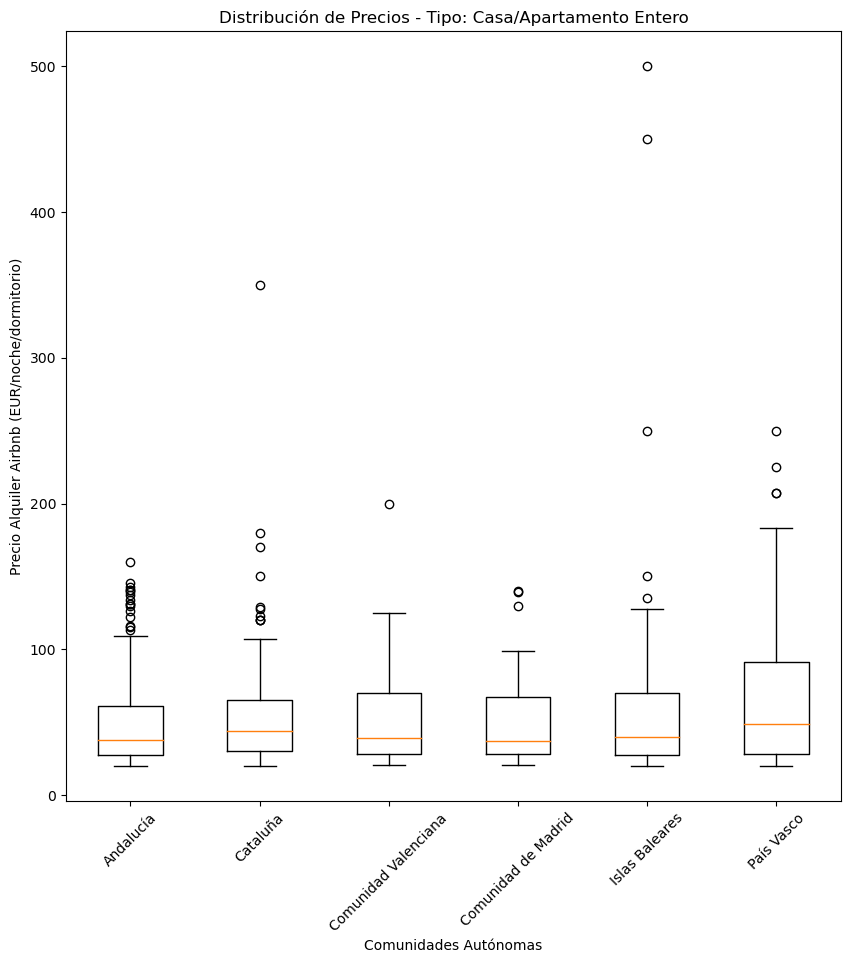

In [347]:
# Group the 'price' column by 'state'
entire_unit_group = pricing_es[pricing_es["room_type"] == "Entire home/apt"].groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot = [entire_unit_group.get_group(state) for state in entire_unit_group.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot)
plt.xticks(range(1, len(entire_unit_group.groups) + 1), entire_unit_group.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Tipo: Casa/Apartamento Entero')
plt.show()

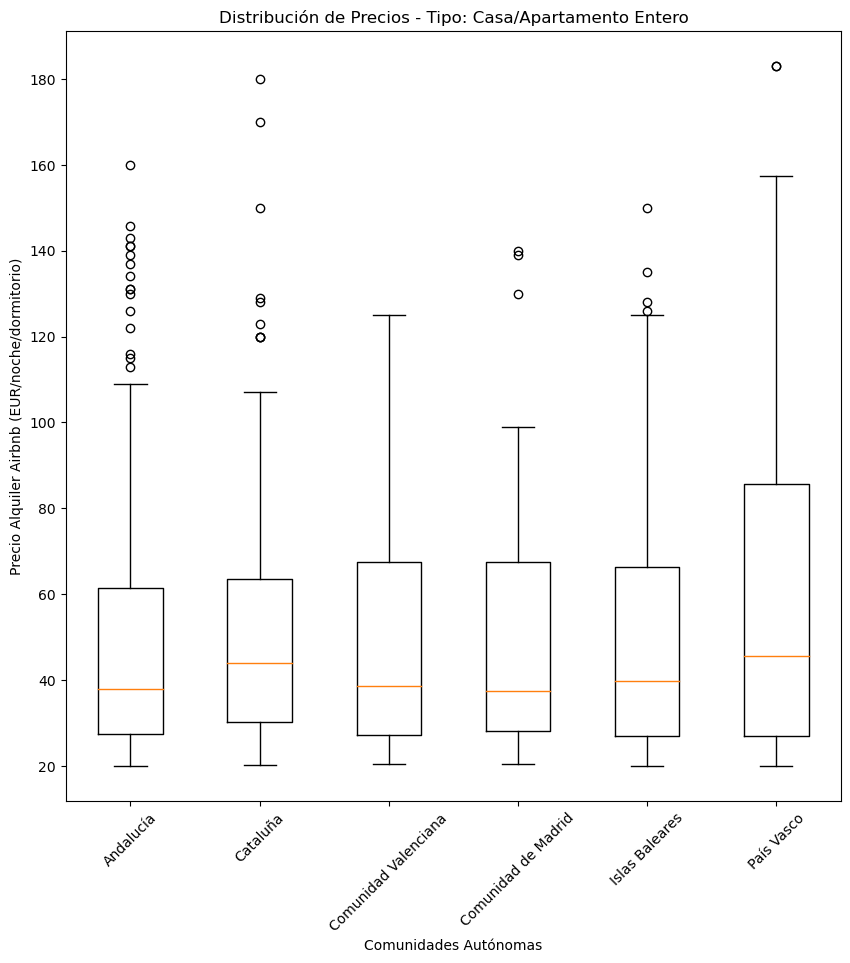

In [348]:
# Quitamos los outliers cuyo precios son > 200

# Group the 'price' column by 'state'
entire_unit_group = pricing_es[(pricing_es["room_type"] == "Entire home/apt") & 
                               (pricing_es["price per night per bedroom"] < 200)].groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot = [entire_unit_group.get_group(state) for state in entire_unit_group.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot)
plt.xticks(range(1, len(entire_unit_group.groups) + 1), entire_unit_group.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Tipo: Casa/Apartamento Entero')
plt.show()

In [349]:
pricing_es[(pricing_es["room_type"] == "Entire home/apt") & 
                               (pricing_es["price per night per bedroom"] < 200)].groupby("state")[["price per night per bedroom"]].describe()

price per night per bedroom                        \
                                           count       mean        std   
state                                                                    
Andalucía                                  170.0  51.645588  33.474161   
Cataluña                                   169.0  51.945750  29.729478   
Comunidad Valenciana                        79.0  48.042691  26.292968   
Comunidad de Madrid                         67.0  50.080402  29.798364   
Islas Baleares                             176.0  51.222113  29.970433   
País Vasco                                  64.0  62.856250  44.723135   

                                                                      
                            min        25%        50%     75%    max  
state                                                                 
Andalucía             20.000000  27.541667  38.000000  61.500  160.0  
Cataluña              20.166667  30.333333  44.000000  63.625  180.0  
Comunidad Valenciana  20.500000  27.190476  38.666667  67.500  125.0  
Comunidad de Madrid   20.428571  28.166667  37.500000  67.500  140.0  
Islas Baleares        20.000000  27.000000  39.687500  66.250  150.0  
País Vasco            20.000000  27.062500  45.562500  85.625  183.0

Distribución del precio por noche - Room type: Others (Private room, Shared room, Hotel room)

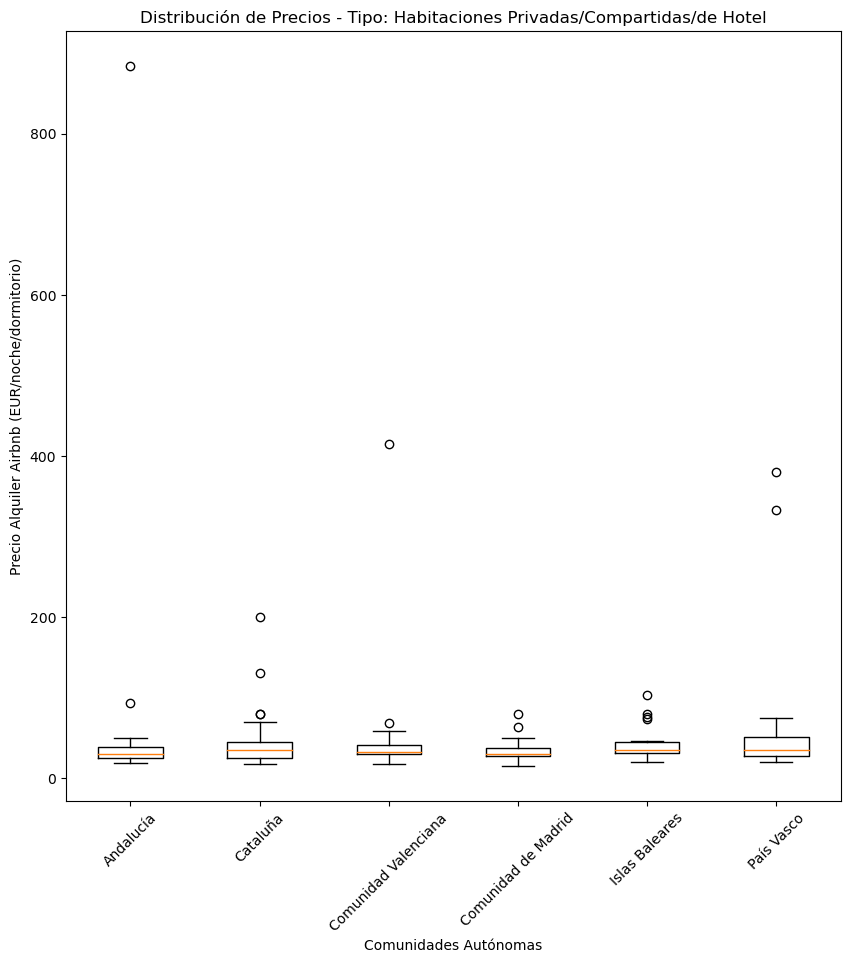

In [350]:
# Group the 'price' column by 'state'
others_group = pricing_es[pricing_es["room_type"] != "Entire home/apt"].groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot2 = [others_group.get_group(state) for state in others_group.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot2)
plt.xticks(range(1, len(others_group.groups) + 1), others_group.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Tipo: Habitaciones Privadas/Compartidas/de Hotel')
plt.show()

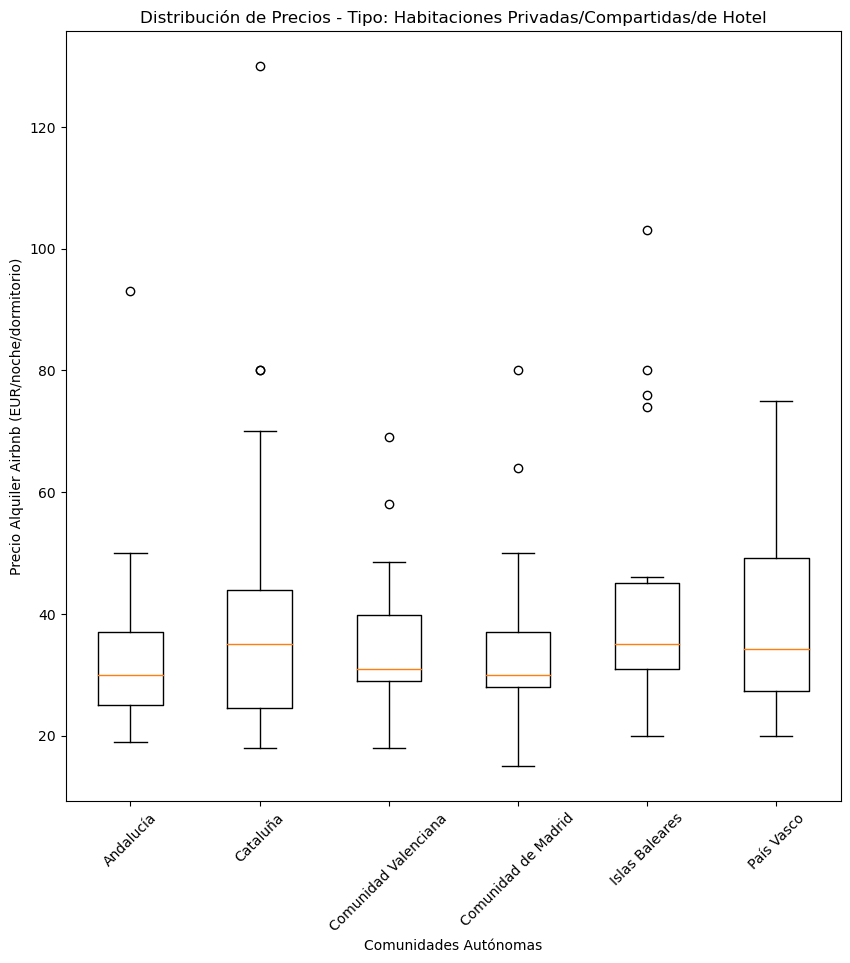

In [351]:
# Quitamos los outliers cuyo precios son > 200

# Group the 'price' column by 'state'
others_group = pricing_es[(pricing_es["room_type"] != "Entire home/apt") & 
                          (pricing_es["price per night per bedroom"] < 200)].groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot2 = [others_group.get_group(state) for state in others_group.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot2)
plt.xticks(range(1, len(others_group.groups) + 1), others_group.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Tipo: Habitaciones Privadas/Compartidas/de Hotel')
plt.show()

In [352]:
pricing_es[(pricing_es["room_type"] != "Entire home/apt") & 
                          (pricing_es["price per night per bedroom"] < 200)].groupby("state")[["price per night per bedroom"]].describe()

price per night per bedroom                              \
                                           count       mean        std   min   
state                                                                          
Andalucía                                   29.0  32.448276  13.972131  19.0   
Cataluña                                    29.0  40.396552  24.088149  18.0   
Comunidad Valenciana                        19.0  35.789474  12.404430  18.0   
Comunidad de Madrid                         33.0  33.535354  12.686303  15.0   
Islas Baleares                              21.0  43.800000  21.184428  20.0   
País Vasco                                  30.0  39.777778  16.673351  20.0   

                                                       
                        25%        50%     75%    max  
state                                                  
Andalucía             25.00  30.000000  37.000   93.0  
Cataluña              24.50  35.000000  44.000  130.0  
Comunidad Valenciana  29.00  31.000000  39.750   69.0  
Comunidad de Madrid   28.00  30.000000  37.000   80.0  
Islas Baleares        31.00  35.000000  45.000  103.0  
País Vasco            27.25  34.166667  49.125   75.0

Distribución del precio por noche - Room type: All

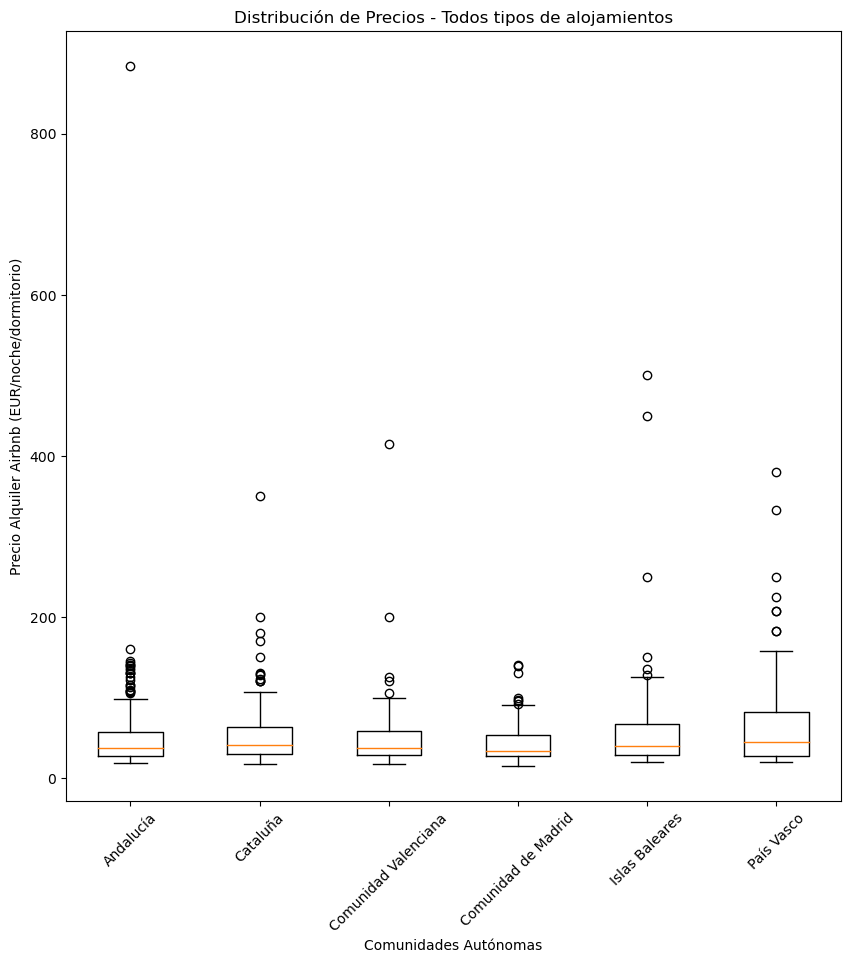

In [353]:
# Group the 'price' column by 'state'
all_groups = pricing_es.groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot3 = [all_groups.get_group(state) for state in all_groups.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot3)
plt.xticks(range(1, len(all_groups.groups) + 1), all_groups.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Todos tipos de alojamientos')
plt.show()

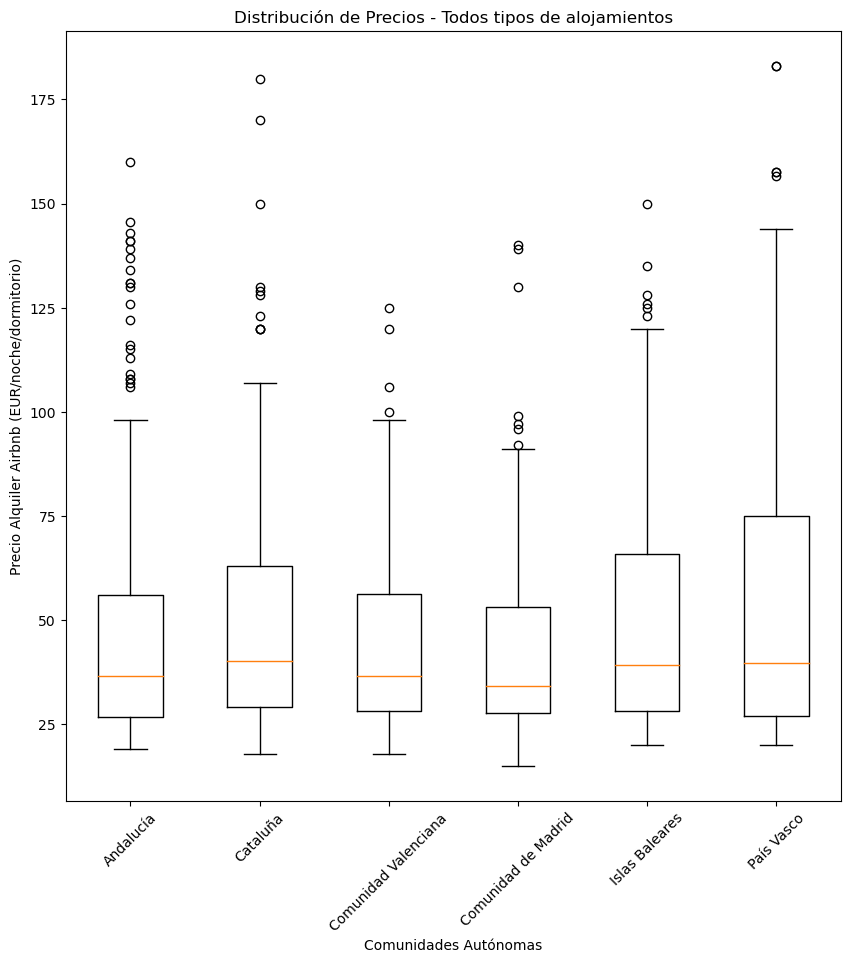

In [354]:
# Quitamos los outliers cuyo precios son > 200

# Group the 'price' column by 'state'
all_groups = pricing_es[pricing_es["price per night per bedroom"] < 200].groupby("state")["price per night per bedroom"]

# Convert the grouped data to a list of lists
data_to_plot3 = [all_groups.get_group(state) for state in all_groups.groups]

# Create the boxplot
plt.figure(figsize=(10,10))
plt.boxplot(data_to_plot3)
plt.xticks(range(1, len(all_groups.groups) + 1), all_groups.groups.keys(), rotation=45)
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Precio Alquiler Airbnb (EUR/noche/dormitorio)')
plt.title('Distribución de Precios - Todos tipos de alojamientos')
plt.show()

In [355]:
# Quitamos los outliers cuyo precios son > 200 - Plotly

andalucia = go.Box(y=pricing_es[(pricing_es["price per night per bedroom"] < 200) & 
                                (pricing_es["state"] == "Andalucía")]["price per night per bedroom"],
                   name='Andalucía')

catalunya = go.Box(y=pricing_es[(pricing_es["price per night per bedroom"] < 200) & 
                                (pricing_es["state"] == "Cataluña")]["price per night per bedroom"],
                   name='Cataluña')

valencia = go.Box(y=pricing_es[(pricing_es["price per night per bedroom"] < 200) & 
                                (pricing_es["state"] == "Comunidad Valenciana")]["price per night per bedroom"],
                   name='Comunidad Valenciana')

baleares = go.Box(y=pricing_es[(pricing_es["price per night per bedroom"] < 200) & 
                                (pricing_es["state"] == "Islas Baleares")]["price per night per bedroom"],
                   name='Islas Baleares')

euskadi = go.Box(y=pricing_es[(pricing_es["price per night per bedroom"] < 200) & 
                               (pricing_es["state"] == "País Vasco")]["price per night per bedroom"],
                 name='País Vasco')

data = [andalucia, catalunya, valencia, baleares, euskadi]

fig_4 = go.Figure(data=data)
fig_4.update_layout(title='<b>Precios Airbnb en España</b>',
                  xaxis_title='<b>Comunidades Autónomas</b>',
                  yaxis_title='<b>Precio Alquiler Airbnb (EUR/noche/dormitorio)</b>',
                  height=600, width=800)

fig_4.show()

In [356]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_4, filename="figure 4", auto_open=False)

'https://plotly.com/~selvie.carolin/9/'

In [357]:
# Quitamos los outliers cuyo precios son > 200

all_pricing_es = pricing_es[pricing_es["price per night per bedroom"] < 200].groupby("state")[["price per night per bedroom"]].describe()
all_pricing_es

price per night per bedroom                              \
                                           count       mean        std   min   
state                                                                          
Andalucía                                  199.0  48.847990  32.095505  19.0   
Cataluña                                   198.0  50.254201  29.205530  18.0   
Comunidad Valenciana                        98.0  45.667068  24.661051  18.0   
Comunidad de Madrid                        100.0  44.620536  26.554065  15.0   
Islas Baleares                             197.0  50.430924  29.207109  20.0   
País Vasco                                  94.0  55.490780  39.479270  20.0   

                                                          
                            25%        50%    75%    max  
state                                                     
Andalucía             26.875000  36.666667  56.00  160.0  
Cataluña              29.250000  40.166667  63.00  180.0  
Comunidad Valenciana  28.166667  36.500000  56.25  125.0  
Comunidad de Madrid   27.666667  34.166667  53.25  140.0  
Islas Baleares        28.166667  39.285714  66.00  150.0  
País Vasco            27.062500  39.687500  75.00  183.0

In [358]:
avg_pricing_state = all_pricing_es.loc[:, "price per night per bedroom"]["mean"].to_frame().reset_index()
avg_pricing_state = avg_pricing_state.rename({"mean": "avg price - Airbnb"}, axis=1)
avg_pricing_state

,state,avg price - Airbnb
0,Andalucía,48.847990
1,Cataluña,50.254201
2,Comunidad Valenciana,45.667068
3,Comunidad de Madrid,44.620536
4,Islas Baleares,50.430924
5,País Vasco,55.490780


In [359]:
avg_pricing_state["avg price - Airbnb"].mean()

49.218582960215336

In [360]:
median_pricing_state = all_pricing_es.loc[:, "price per night per bedroom"]["50%"].to_frame().reset_index()
median_pricing_state = median_pricing_state.rename({"50%": "median price - Airbnb"}, axis=1)
median_pricing_state

,state,median price - Airbnb
0,Andalucía,36.666667
1,Cataluña,40.166667
2,Comunidad Valenciana,36.500000
3,Comunidad de Madrid,34.166667
4,Islas Baleares,39.285714
5,País Vasco,39.687500


In [361]:
median_price_airbnb = round(median_pricing_state["median price - Airbnb"].median(),0)
median_price_airbnb

38.0

In [362]:
pricing_es[pricing_es["price per night per bedroom"] < 200].to_csv("dashboard/airbnb_pricing_es_no_outliers.csv", encoding="utf-8")

Distribución de precio por noche por dormitorio - Todos tipos de alojamientos y todas las comunidades

C:\Users\Selvie\AppData\Local\Temp\ipykernel_8480\2480434664.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




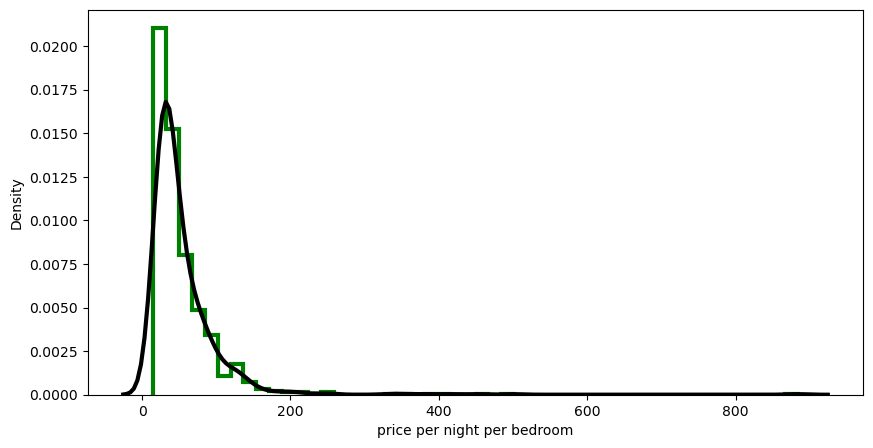

In [363]:
plt.figure(figsize=(10,5))
sns.distplot(pricing_es["price per night per bedroom"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

C:\Users\Selvie\AppData\Local\Temp\ipykernel_8480\3869890055.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




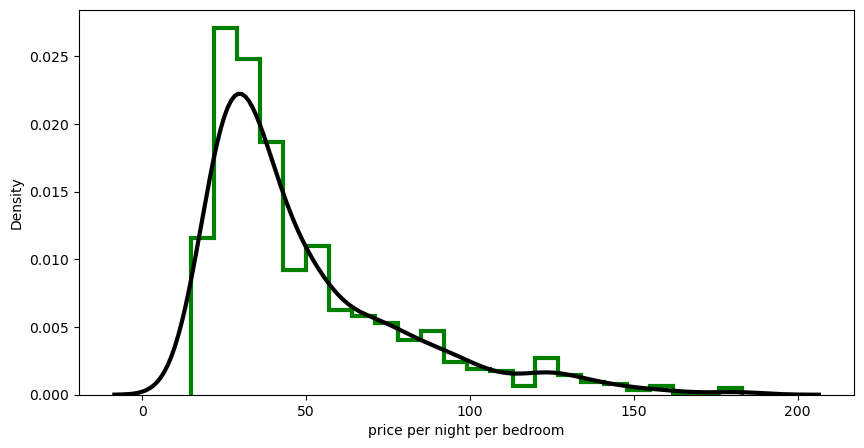

In [364]:
# Quitamos los outliers cuyo precios son > 200

pricing_es_no_outliers = pricing_es[pricing_es["price per night per bedroom"] < 200]

plt.figure(figsize=(10,5))
sns.distplot(pricing_es_no_outliers["price per night per bedroom"],
            kde_kws={"color": "k", "lw": 3, "label": "KDE"},
            hist_kws={"histtype": "step", "linewidth": 3,
                      "alpha": 1, "color": "g"});

In [365]:
pricing_es_no_outliers = pricing_es[pricing_es["price per night per bedroom"] < 200]

data = go.Histogram(x = pricing_es_no_outliers["price per night per bedroom"],
                     opacity = 0.9,
                     name = 'price per night per bedroom',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

layout = go.Layout(barmode='overlay',
                   title=' <b>Distribución de precios de Airbnb en España</b>',
                   xaxis=dict(title='<b>Precio (EUR/noche/dormitorio)</b>'),
                   yaxis=dict( title='<b>Densidad</b>'),
)
fig_5 = go.Figure(data=data, layout=layout)
fig_5

In [366]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_5, filename="figure 5", auto_open=False)

'https://plotly.com/~selvie.carolin/11/'

Comentario sobre la distribución de precio (boxplots e histograms):
- El precio mediano en todas las comunidades está a 38 EUR/noche/dormitorio approximadamente. 
- El precio promedio de todas las comunidades está a 49 EUR/noche/dormitorio approximadamente.
- Como los precios muestran una distribución sesgada a la derecha (sesgo positivo), utilizaré el precio mediano (38 EUR/noche/dormitorio) en lugar del precio medio. Esto coincide con la hipótesis número 3.

Comprobamos la correlación entre columnas

C:\Users\Selvie\AppData\Local\Temp\ipykernel_8480\2190880319.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



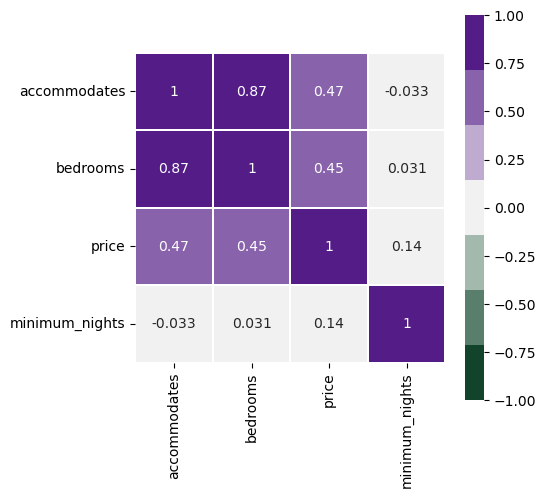

In [367]:
plt.figure(figsize=(5,5))
sns.heatmap(pricing_es[["room_type", "accommodates", "bedrooms", "price", "minimum_nights", 
                        "state"]].corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

In [368]:
data = pricing_es[["room_type", "accommodates", "bedrooms", "price", "minimum_nights",
                        "state"]].corr()

fig_6 = px.imshow(data, text_auto=True, color_continuous_scale=["pink", "purple"])
fig_6

C:\Users\Selvie\AppData\Local\Temp\ipykernel_8480\3656650010.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [369]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_6, filename="figure 6", auto_open=False)

'https://plotly.com/~selvie.carolin/13/'

Comentario sobre la correlación entre columnas:
- Hay alta correlación entre "bedrooms" (número de dormitorios) y "accomodates" (capacidad de alojamientos).
- Hay bastante correlación entre "price"-"accomodates" y "precio"-"bedrooms". 
- Como no tengo información de metros cuadrados, utilizaré la información de "bedrooms" para poder analizar más.

Comprobamos los alojamientos con más reseñas y mejor rating - ¿Cuántos dormitorios tienen approx.?

In [370]:
pricing_es.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           900 non-null    int64  
 1   name                         900 non-null    object 
 2   property_type                900 non-null    object 
 3   room_type                    900 non-null    object 
 4   accommodates                 900 non-null    int64  
 5   bedrooms                     900 non-null    float64
 6   beds                         900 non-null    float64
 7   price                        900 non-null    float64
 8   minimum_nights               900 non-null    int64  
 9   price per night              900 non-null    float64
 10  price per night per bedroom  900 non-null    float64
 11  number_of_reviews            900 non-null    int64  
 12  review_scores_rating         900 non-null    float64
 13  latitude            

In [371]:
pricing_es["review_scores_rating"].unique()

array([4.31      , 4.56      , 4.87      , 4.72      , 4.64      ,
       4.75      , 4.59      , 4.4       , 4.67      , 4.46      ,
       4.2       , 4.35      , 4.51      , 4.28      , 4.79      ,
       4.24      , 4.37      , 4.38      , 4.86      , 4.58      ,
       4.68      , 4.78      , 4.41      , 4.74      , 4.71      ,
       5.        , 4.21      , 4.93      , 4.        , 4.45      ,
       4.33      , 4.52      , 4.57      , 4.1       , 4.12      ,
       4.65      , 4.77      , 4.22      , 3.57      , 4.11      ,
       4.69      , 4.97      , 4.61      , 4.36      , 4.66      ,
       4.8       , 4.63      , 4.73      , 4.3       , 3.5       ,
       0.        , 4.23      , 4.34      , 4.62      , 4.5       ,
       4.85      , 4.55      , 3.75      , 4.29      , 4.88      ,
       4.47      , 4.96      , 4.7       , 4.98      , 4.82      ,
       4.44      , 4.49      , 4.27      , 4.53      , 4.83      ,
       4.89      , 4.84      , 2.04555556, 4.48      , 4.32   

In [372]:
# Filtra los alojamientos que tienen un buen rating (>= 4.0)

prop_rating_review = pricing_es[pricing_es["review_scores_rating"] >= 4]
prop_rating_review

,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
0,18674,Huge flat for 8 people close to Sagrada Familia,Entire rental unit,Entire home/apt,8,3.0,6.0,129.0,1,129.000000,43.000000,33,4.31,41.405560,2.17262,"277, Carrer de la Marina, el Baix Guinardó, Ho...",Cataluña,Barcelona,Barcelona,8025
1,124342,BORN CENTRICO / MUSEO PICASSO / 10 min to BEACH,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,20.000000,79,4.56,41.382481,2.18115,"2, Carrer de Joan Massana, la Ribera, Sant Per...",Cataluña,Barcelona,Barcelona,8003
2,128463,Private Suite in residential area!!,Private room in rental unit,Private room,2,1.0,1.0,60.0,3,20.000000,20.000000,347,4.87,41.371550,2.13664,"Carrer de la Noguera Pallaresa, Sants, Sants-M...",Cataluña,Barcelona,Barcelona,8001
3,130227,Spacious Room with Pool and Terrace,Private room in condo,Private room,2,3.0,1.0,80.0,31,2.580645,80.000000,130,4.72,41.407790,2.21146,"317, Carrer de Llull, el Besòs i el Maresme, S...",Cataluña,Barcelona,Barcelona,8001
4,135513,APARTMENT AT RAMBLA POBLE NOU AND BEACH,Entire rental unit,Entire home/apt,5,2.0,3.0,90.0,90,1.000000,90.000000,131,4.64,41.397870,2.20429,"3, Passatge d'Aymà, el Poblenou, Sant Martí, B...",Cataluña,Barcelona,Barcelona,8005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,3675253,ESTUDIO EN CENTRO HISTÓRICO Free Cov. OZONO,Entire rental unit,Entire home/apt,2,2.0,1.0,75.0,2,37.500000,37.500000,285,4.52,39.475670,-0.37773,"Dempanadas, 2, Carrer de Calatrava, la Seu, Ci...",Comunidad Valenciana,Valencia,Valencia,46003
896,3684986,DE DISEÑO,Entire rental unit,Entire home/apt,4,2.0,3.0,102.0,2,51.000000,25.500000,359,4.47,39.476250,-0.37753,"17, Carrer de Calatrava, la Seu, Ciutat Vella,...",Comunidad Valenciana,Valencia,Valencia,46001
897,3719698,Two bedroom flat; centre of Russafa,Entire rental unit,Entire home/apt,6,2.0,4.0,95.0,3,31.666667,31.666667,6,4.67,39.461750,-0.37140,"Mercat de Russafa, 30, Plaça del Baró de Corte...",Comunidad Valenciana,Valencia,Valencia,46006
898,3736295,Balcony to the sea,Entire rental unit,Entire home/apt,6,3.0,4.0,141.0,2,70.500000,23.500000,45,4.67,39.472960,-0.32794,"248, Carrer de la Reina, el Cabanyal, el Caban...",Comunidad Valenciana,Valencia,Valencia,46011


In [373]:
prop_rating_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 899
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           850 non-null    int64  
 1   name                         850 non-null    object 
 2   property_type                850 non-null    object 
 3   room_type                    850 non-null    object 
 4   accommodates                 850 non-null    int64  
 5   bedrooms                     850 non-null    float64
 6   beds                         850 non-null    float64
 7   price                        850 non-null    float64
 8   minimum_nights               850 non-null    int64  
 9   price per night              850 non-null    float64
 10  price per night per bedroom  850 non-null    float64
 11  number_of_reviews            850 non-null    int64  
 12  review_scores_rating         850 non-null    float64
 13  latitude            

In [374]:
prop_rating_review["number_of_reviews"].unique()

array([ 33,  79, 347, 130, 131,  65,  83, 391, 109,  26,  27, 190,  38,
       104, 126, 254,  61,  94,   5,  57,  67, 336,  28,  64,  17,  93,
       114,   1,  99,  73, 333,  11, 113, 602,   2,   8, 353, 166,  84,
        72, 117, 503, 332,  46,  30,  63, 140, 200, 120, 149, 310, 153,
       111, 155,  22, 354,  48,  69, 450,  82, 218, 101,  25,  78,  12,
       322, 275, 116, 259,  35, 106,  43,  42, 319, 102, 442, 312, 217,
       644,  53,   7, 146,  51,  75, 157, 238,  18,  36, 127,  21,  76,
        52, 103, 108, 402, 129,  16, 474,  13, 125, 100, 241,   6, 175,
        58, 184,  49,  19,  59, 139, 321, 123,  80, 148,   9,  20, 110,
       252,  92,  34, 197,  47,  44,  29,  62, 738, 143, 546,  68, 293,
        74, 665,  32, 386,  40,  23, 830,  55, 367,  60,  10,  15,  24,
       304,   4, 221,   3,  87,  97,  81, 229, 261, 403, 222,  41,  85,
        37, 134, 173, 172, 187, 739, 177, 112, 246, 281, 156, 228, 215,
       152, 701, 305, 242, 637, 210, 138, 264, 619, 344, 142, 75

In [375]:
# Filtra los top 200 alojamientos que tienen muchas reseñas

prop_rating_review = prop_rating_review.sort_values(by="number_of_reviews", ascending=False)
top_200_props = prop_rating_review.head(200)
top_200_props


,id,name,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,price per night,price per night per bedroom,number_of_reviews,review_scores_rating,latitude,longitude,location_geo,state,province,municipality,zip_code
199,3765625,"Room with futon in Casco Viejo, Bilbao",Private room in rental unit,Private room,2,1.0,1.0,27.0,1,27.000000,27.000000,830,4.35,43.25531,-2.92213,"3, Donibane Plazatxoa, Atxuri, Ibaiondo, Bilba...",País Vasco,Bizkaia,Bilbao,48006
757,632876,MINI LOFT COOL NEIGHBORHOOD CENTER,Entire rental unit,Entire home/apt,1,1.0,1.0,30.0,4,7.500000,30.000000,801,4.50,37.40125,-5.99025,"Allegro ma non tropo, Calle Parras, San Gil, C...",Andalucía,Sevilla,Sevilla,41002
724,384727,Private Room in Center of Seville,Private room in rental unit,Private room,2,1.0,1.0,57.0,2,28.500000,28.500000,760,4.87,37.38498,-5.99440,"Oficina de Correos, 32, Avenida de la Constitu...",Andalucía,Sevilla,Sevilla,41001
356,721057,"Cosy, city centre flat",Entire rental unit,Entire home/apt,3,2.0,2.0,62.0,3,20.666667,20.666667,752,4.76,40.41045,-3.70105,"17, Calle de San Carlos, Lavapiés, Embajadores...",Comunidad de Madrid,Madrid,Madrid,28012
453,2343063,Nice Flat in the center VFT/MA/00202,Entire rental unit,Entire home/apt,2,2.0,1.0,45.0,2,22.500000,22.500000,743,4.78,36.72464,-4.41773,"Mercado de la Merced, Calle Frailes, La Merced...",Andalucía,Málaga,Málaga,29012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,723088,LOVELY FLAT IN PLAZA DE CHUECA,Entire rental unit,Entire home/apt,6,2.0,3.0,100.0,3,33.333333,33.333333,180,4.76,40.42536,-3.69887,"Guasa, 9, Calle de San Lorenzo, Chueca, Justic...",Comunidad de Madrid,Madrid,Madrid,28004
537,899914,Casa familiar con terraza privada y patio inte...,Entire home,Entire home/apt,4,3.0,3.0,257.0,3,85.666667,28.555556,180,4.77,39.57360,2.64679,"CC Santíssima Trinitat, Carrer de Catany, el C...",Islas Baleares,Mallorca,Palma de Mallorca,70712
803,102524,EXCLUSIVE VILLA WITH POOL & 5 SUITES ON THE BEACH,Entire villa,Entire home/apt,15,5.0,20.0,350.0,1,350.000000,70.000000,178,4.53,39.48197,-0.32456,"Passeig Marítim, la Malva-rosa, Poblats Maríti...",Comunidad Valenciana,Valencia,Valencia,46011
319,86042,Cozy attic with intimate rooftop terrace+ elev...,Entire rental unit,Entire home/apt,5,3.0,3.0,143.0,3,47.666667,47.666667,177,4.83,40.40939,-3.69812,"14, Calle de San Cosme y San Damián, Lavapiés,...",Comunidad de Madrid,Madrid,Madrid,28012


In [376]:
top_200_props["number_of_reviews"].unique() # Los top 200 propiedades tienen más de 177 reseñas por propiedad

array([830, 801, 760, 752, 743, 739, 738, 701, 665, 648, 644, 643, 637,
       619, 602, 563, 546, 526, 524, 518, 514, 510, 503, 486, 483, 474,
       466, 450, 442, 440, 436, 435, 428, 422, 419, 417, 412, 403, 402,
       401, 391, 386, 378, 368, 367, 365, 362, 359, 356, 355, 354, 353,
       351, 347, 346, 344, 342, 341, 340, 339, 336, 335, 334, 333, 332,
       331, 330, 326, 322, 321, 319, 312, 311, 310, 309, 305, 304, 300,
       297, 293, 286, 285, 283, 281, 277, 276, 275, 274, 271, 270, 267,
       265, 264, 263, 262, 261, 259, 258, 257, 255, 254, 252, 251, 250,
       249, 248, 246, 243, 242, 241, 240, 239, 238, 237, 229, 228, 222,
       221, 220, 218, 217, 215, 214, 212, 210, 209, 208, 207, 205, 204,
       202, 201, 200, 198, 197, 194, 190, 187, 184, 182, 181, 180, 178,
       177], dtype=int64)

In [377]:
top_200_props_regions = top_200_props.groupby(["state", "province", 
                            "municipality"])["id"].count().to_frame().sort_values(by="id", ascending=False)
top_200_props_regions = top_200_props_regions.rename({"id": "num_properties"}, axis=1)
top_200_props_regions

num_properties
state                province  municipality                          
Andalucía            Sevilla   Sevilla                             47
Comunidad de Madrid  Madrid    Madrid                              32
Andalucía            Málaga    Málaga                              30
Comunidad Valenciana Valencia  Valencia                            26
Cataluña             Barcelona Barcelona                           24
País Vasco           Bizkaia   Bilbao                               9
                     Gipuzkoa  Donostia/San Sebastián               7
Islas Baleares       Mallorca  Palma de Mallorca                    7
Cataluña             Girona    Begur                                2
                               Girona                               2
Islas Baleares       Mallorca  Banyalbufar                          2
                               Selva                                2
País Vasco           Gipuzkoa  Aia                                  1
Islas Baleares       Menorca   Migjorn Gran, Es                     1
                               Ciutadella de Menorca                1
Andalucía            Málaga    Almargen                             1
Islas Baleares       Mallorca  Campanet                             1
                               Binissalem                           1
Cataluña             Girona    Escala, L'                           1
                               Cadaqués                             1
                               Blanes                               1
Islas Baleares       Mallorca  Alcúdia                              1

In [378]:
top_200_props["bedrooms"].describe()

count    200.000000
mean       1.585000
std        0.816153
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: bedrooms, dtype: float64

In [379]:
top_200_props.groupby(["room_type", "bedrooms"])["id"].count()

room_type        bedrooms
Entire home/apt  1.0         80
                 2.0         59
                 3.0         17
                 4.0          3
                 5.0          2
Private room     1.0         35
                 2.0          2
                 3.0          1
                 4.0          1
Name: id, dtype: int64

In [380]:
top_200_props.groupby("room_type")["id"].count()

room_type
Entire home/apt    161
Private room        39
Name: id, dtype: int64

In [381]:
top_200_props.groupby(["bedrooms", "accommodates"])["id"].count().to_frame().sort_values(by="id", ascending=False)

id
bedrooms accommodates    
1.0      2             59
         4             33
2.0      4             30
1.0      3             16
2.0      3             10
3.0      6              9
2.0      6              8
1.0      1              7
2.0      5              7
         2              5
3.0      5              3
         7              2
         8              2
         4              2
2.0      7              1
4.0      2              1
         8              1
         9              1
         10             1
5.0      10             1
         15             1

In [382]:
top_200_props.groupby("minimum_nights")["id"].count().to_frame().sort_values(by="id", ascending=False)

,id
minimum_nights,
2,73
3,59
1,35
4,15
5,6
7,4
30,3
31,3
6,1


In [383]:
top_200_props.to_csv("dashboard/top_200_props.csv", encoding="utf-8")

Comentario:
- Para poder analizar las caractéristicas de los alojamientos más demandados, me enfoco sólo en los top 200 alojamientos que tienen un buen rating (> 4.0) y que reciben muchas reseñas (entre 200-800 reseñas por alojamiento).
- La mayoría de los huéspedes alquiló una casa/apartamento entero de 1-2 dormitorios que puedan caber 2-4 personas en las capitales como Sevilla, Barcelona y Madrid y se alojaron un mínimo de 2-3 noches, por lo cual coincide con las hipótesis número 1 y 2.


### 3. ¿Mejor poner una propiedad en alquiler por Airbnb o por inmobiliaria?

#### Alquiler Airbnb vs Alquiler Inmobiliario (Ingreso)

Filtra los precios de inmobiliaria (Idealista) en base a:
- las características de los top 200 alojamientos Airbnb - [alquiler de una casa/piso entero, 1-2 dormitorios, capital de provincia]
- las comunidades que tienen alto número de viajeros, pero tienen poca competencia de viviendas turísticas y que no tienen alojamientos Airbnb - ['Canarias', 'Castilla y León', 'Aragón', 'Castilla - La Mancha', 'Extremadura']

Suposiciones de una vivienda en ciudades grandes (valores aproximados):
- 1 dormitorio = 15 m2; 2 dormitorios = 30 m2
- 1 baño = 5 m2
- 1 cocina_office = 25 m2

In [384]:
invested_property = [("dormitorio", 15, 2),
                     ("baño", 5, 1),
                     ("cocina_office", 25, 1)]
invested_property = pd.DataFrame(invested_property, columns=["Habitaciones", "Superficie (m2)", "Número Habitaciones"])
invested_property["Subtotal Superficie (m2)"] = invested_property["Superficie (m2)"] * invested_property["Número Habitaciones"]
invested_property

,Habitaciones,Superficie (m2),Número Habitaciones,Subtotal Superficie (m2)
0,dormitorio,15,2,30
1,baño,5,1,5
2,cocina_office,25,1,25


In [385]:
print(f'Hay que buscar una propiedad de {invested_property["Subtotal Superficie (m2)"].sum()} m2 en {invest_states}')

Hay que buscar una propiedad de 60 m2 en ['Canarias', 'Castilla y León', 'Aragón', 'Castilla - La Mancha', 'Extremadura']


Calcula el ingreso de alquiler con Airbnb. Para las comunidades que NO tienen competencia de Airbnb (no hay alojamientos Airbnb en su zona), aplicamos el precio mediano de todas las comunidades:
- precio mediano 20 EUR/noche/dormitorio * 2 dormitorios = 40 EUR/noche
- 40 EUR/noche * 30 días al mes = 1200 EUR/mes

Para las comunidades que tienen competencia de Airbnb, aplicamos el precio mediano de cada comunidad.

Compara el ingreso de alquiler de Airbnb con él de inmobiliaria

In [386]:
idealista_pricing

,Comunidad,Precio Venta (EUR/m2),Precio Alquiler (EUR/m2/mes),Precio Venta Estandarizado,Precio Alquiler Estandarizado
0,Andalucía,1970,9.7,0.208135,0.033700
1,Comunidad Valenciana,1656,9.0,-0.202492,-0.215306
2,Cataluña,2328,14.7,0.676303,1.812311
3,Canarias,2167,11.7,0.465758,0.745144
4,Islas Baleares,3746,14.5,2.530663,1.741166
5,Galicia,1353,7.7,-0.598734,-0.677744
6,Comunidad de Madrid,3111,14.8,1.700255,1.847883
7,Cantabria,1515,8.8,-0.386881,-0.286450
8,Castilla y León,1155,7.3,-0.857664,-0.820033
9,Murcia,1130,7.0,-0.890357,-0.926750


In [387]:
# Precio promedio de Airbnb (EUR/noche/dormitorio) después de quitar los outliers cuyo precios son > 200

median_price_airbnb

38.0

In [388]:
# Si alquilamos la propiedad por inmobiliaria, hay que multiplicar su precio de alquiler con 60m2 de propiedad que tendríamos que invertir

rental_comparison = idealista_pricing[["Comunidad", "Precio Alquiler (EUR/m2/mes)"]]
rental_comparison["Beneficio_Inmobiliaria (EUR/mes)"] = rental_comparison["Precio Alquiler (EUR/m2/mes)"] * invested_property["Subtotal Superficie (m2)"].sum()
rental_comparison

C:\Users\Selvie\AppData\Local\Temp\ipykernel_8480\1735967820.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes)
0,Andalucía,9.7,582.0
1,Comunidad Valenciana,9.0,540.0
2,Cataluña,14.7,882.0
3,Canarias,11.7,702.0
4,Islas Baleares,14.5,870.0
5,Galicia,7.7,462.0
6,Comunidad de Madrid,14.8,888.0
7,Cantabria,8.8,528.0
8,Castilla y León,7.3,438.0
9,Murcia,7.0,420.0


In [389]:
median_pricing_state

,state,median price - Airbnb
0,Andalucía,36.666667
1,Cataluña,40.166667
2,Comunidad Valenciana,36.500000
3,Comunidad de Madrid,34.166667
4,Islas Baleares,39.285714
5,País Vasco,39.687500


In [390]:
median_pricing_state = median_pricing_state.rename({"state": "Comunidad", "median price - Airbnb": "Precio Airbnb (EUR/noche/dormitorio)"}, axis=1)
median_pricing_state

,Comunidad,Precio Airbnb (EUR/noche/dormitorio)
0,Andalucía,36.666667
1,Cataluña,40.166667
2,Comunidad Valenciana,36.500000
3,Comunidad de Madrid,34.166667
4,Islas Baleares,39.285714
5,País Vasco,39.687500


In [391]:
# Extraemos los precios medianos de Airbnb de cada comunidad

rental_comparison = pd.merge(rental_comparison, median_pricing_state, on="Comunidad", how="left")
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche/dormitorio)
0,Andalucía,9.7,582.0,36.666667
1,Comunidad Valenciana,9.0,540.0,36.500000
2,Cataluña,14.7,882.0,40.166667
3,Canarias,11.7,702.0,NaN
4,Islas Baleares,14.5,870.0,39.285714
5,Galicia,7.7,462.0,NaN
6,Comunidad de Madrid,14.8,888.0,34.166667
7,Cantabria,8.8,528.0,NaN
8,Castilla y León,7.3,438.0,NaN
9,Murcia,7.0,420.0,NaN


In [392]:
# Sustituimos los NaNs con el precio mediano de Airbnb de todas las comunidades

rental_comparison = rental_comparison.fillna(median_price_airbnb)
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche/dormitorio)
0,Andalucía,9.7,582.0,36.666667
1,Comunidad Valenciana,9.0,540.0,36.500000
2,Cataluña,14.7,882.0,40.166667
3,Canarias,11.7,702.0,38.000000
4,Islas Baleares,14.5,870.0,39.285714
5,Galicia,7.7,462.0,38.000000
6,Comunidad de Madrid,14.8,888.0,34.166667
7,Cantabria,8.8,528.0,38.000000
8,Castilla y León,7.3,438.0,38.000000
9,Murcia,7.0,420.0,38.000000


In [393]:
# Suponemos que es un alojamiento de 2 dormitorios.
# Para ser un poquito más realista, pondríamos 15 días de disponibilidad en lugar de 30 días.
# Suponemos que el alojamiento esté ocupado por 15 días al mes.

calendar_days = 15
bedrooms_no = 2
rental_comparison["Precio Airbnb (EUR/noche)"] = round((rental_comparison["Precio Airbnb (EUR/noche/dormitorio)"] * bedrooms_no),0)
rental_comparison["Beneficio_Airbnb (EUR/mes)"] = round((rental_comparison["Precio Airbnb (EUR/noche)"] * calendar_days),0)
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche/dormitorio),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes)
0,Andalucía,9.7,582.0,36.666667,73.0,1095.0
1,Comunidad Valenciana,9.0,540.0,36.500000,73.0,1095.0
2,Cataluña,14.7,882.0,40.166667,80.0,1200.0
3,Canarias,11.7,702.0,38.000000,76.0,1140.0
4,Islas Baleares,14.5,870.0,39.285714,79.0,1185.0
5,Galicia,7.7,462.0,38.000000,76.0,1140.0
6,Comunidad de Madrid,14.8,888.0,34.166667,68.0,1020.0
7,Cantabria,8.8,528.0,38.000000,76.0,1140.0
8,Castilla y León,7.3,438.0,38.000000,76.0,1140.0
9,Murcia,7.0,420.0,38.000000,76.0,1140.0


In [394]:
rental_comparison = rental_comparison.drop("Precio Airbnb (EUR/noche/dormitorio)", axis=1)

In [395]:
rental_comparison = rental_comparison.sort_values(by="Beneficio_Airbnb (EUR/mes)", ascending=False)
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes)
2,Cataluña,14.7,882.0,80.0,1200.0
11,País Vasco,12.6,756.0,79.0,1185.0
4,Islas Baleares,14.5,870.0,79.0,1185.0
9,Murcia,7.0,420.0,76.0,1140.0
17,Ceuta,9.7,582.0,76.0,1140.0
16,La Rioja,7.2,432.0,76.0,1140.0
15,Comunidad de Navarra,9.6,576.0,76.0,1140.0
14,Extremadura,5.8,348.0,76.0,1140.0
13,Castilla - La Mancha,6.3,378.0,76.0,1140.0
12,Aragón,8.4,504.0,76.0,1140.0


In [396]:
rental_comparison["Diferencia (EUR/mes)"] = rental_comparison["Beneficio_Airbnb (EUR/mes)"] - rental_comparison["Beneficio_Inmobiliaria (EUR/mes)"]
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes),Diferencia (EUR/mes)
2,Cataluña,14.7,882.0,80.0,1200.0,318.0
11,País Vasco,12.6,756.0,79.0,1185.0,429.0
4,Islas Baleares,14.5,870.0,79.0,1185.0,315.0
9,Murcia,7.0,420.0,76.0,1140.0,720.0
17,Ceuta,9.7,582.0,76.0,1140.0,558.0
16,La Rioja,7.2,432.0,76.0,1140.0,708.0
15,Comunidad de Navarra,9.6,576.0,76.0,1140.0,564.0
14,Extremadura,5.8,348.0,76.0,1140.0,792.0
13,Castilla - La Mancha,6.3,378.0,76.0,1140.0,762.0
12,Aragón,8.4,504.0,76.0,1140.0,636.0


In [397]:
rental_comparison = rental_comparison.sort_values(by="Diferencia (EUR/mes)", ascending=False)
rental_comparison

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes),Diferencia (EUR/mes)
14,Extremadura,5.8,348.0,76.0,1140.0,792.0
13,Castilla - La Mancha,6.3,378.0,76.0,1140.0,762.0
9,Murcia,7.0,420.0,76.0,1140.0,720.0
16,La Rioja,7.2,432.0,76.0,1140.0,708.0
8,Castilla y León,7.3,438.0,76.0,1140.0,702.0
5,Galicia,7.7,462.0,76.0,1140.0,678.0
10,Asturias,8.0,480.0,76.0,1140.0,660.0
12,Aragón,8.4,504.0,76.0,1140.0,636.0
7,Cantabria,8.8,528.0,76.0,1140.0,612.0
15,Comunidad de Navarra,9.6,576.0,76.0,1140.0,564.0


In [398]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=rental_comparison["Comunidad"], y=rental_comparison["Diferencia (EUR/mes)"], 
           name="Diferencia de Precios entre Airbnb e Inmobiliaria (EUR/mes)"),
    secondary_y=False,
)


# Add figure title and legend
fig.update_layout(
    title_text="<b>Diferencia de Precios entre Airbnb e Inmobiliaria (EUR/mes)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Precio de Alquiler (EUR/mes)</b>", secondary_y=False)

fig.show()

In [399]:
rental_comparison.to_csv("dashboard/rental_comparison.csv", encoding="utf-8")

In [400]:
# Filtramos las 5 comunidades elegidas

rental_comparison_filter = rental_comparison[rental_comparison["Comunidad"].isin(invest_states)]
rental_comparison_filter

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes),Diferencia (EUR/mes)
14,Extremadura,5.8,348.0,76.0,1140.0,792.0
13,Castilla - La Mancha,6.3,378.0,76.0,1140.0,762.0
8,Castilla y León,7.3,438.0,76.0,1140.0,702.0
12,Aragón,8.4,504.0,76.0,1140.0,636.0
3,Canarias,11.7,702.0,76.0,1140.0,438.0


In [401]:
rental_comparison_filter = pd.merge(rental_comparison_filter, ine_merged, on="Comunidad", how="left")
rental_comparison_filter

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes),Diferencia (EUR/mes),Num_viviendas_turisticas,Porcentaje viviendas turísticas,Viajeros Apartamentos turísticos,Viajeros Alojamientos de turismo rural,Total_Viajeros,Num_viviendas_turisticas_std,Porcentaje viviendas turísticas_std,Total_Viajeros_std
0,Extremadura,5.8,348.0,76.0,1140.0,792.0,1478,0.23,11207,13045,24252,-0.781612,-0.801616,-0.404640
1,Castilla - La Mancha,6.3,378.0,76.0,1140.0,762.0,3655,0.29,5457,21085,26542,-0.680576,-0.753604,-0.373033
2,Castilla y León,7.3,438.0,76.0,1140.0,702.0,6171,0.36,17546,40554,58100,-0.563806,-0.697590,0.062542
3,Aragón,8.4,504.0,76.0,1140.0,636.0,3744,0.48,15390,11900,27290,-0.676445,-0.601565,-0.362709
4,Canarias,11.7,702.0,76.0,1140.0,438.0,40935,3.93,250698,8323,259021,1.049618,2.159139,2.835722


In [402]:
rental_comparison_filter = rental_comparison_filter.drop(["Num_viviendas_turisticas", "Porcentaje viviendas turísticas", 
                                                            "Viajeros Apartamentos turísticos", "Viajeros Alojamientos de turismo rural"], axis=1)


In [403]:
rental_comparison_filter = rental_comparison_filter.sort_values(by="Diferencia (EUR/mes)", ascending=False)
rental_comparison_filter

,Comunidad,Precio Alquiler (EUR/m2/mes),Beneficio_Inmobiliaria (EUR/mes),Precio Airbnb (EUR/noche),Beneficio_Airbnb (EUR/mes),Diferencia (EUR/mes),Total_Viajeros,Num_viviendas_turisticas_std,Porcentaje viviendas turísticas_std,Total_Viajeros_std
0,Extremadura,5.8,348.0,76.0,1140.0,792.0,24252,-0.781612,-0.801616,-0.404640
1,Castilla - La Mancha,6.3,378.0,76.0,1140.0,762.0,26542,-0.680576,-0.753604,-0.373033
2,Castilla y León,7.3,438.0,76.0,1140.0,702.0,58100,-0.563806,-0.697590,0.062542
3,Aragón,8.4,504.0,76.0,1140.0,636.0,27290,-0.676445,-0.601565,-0.362709
4,Canarias,11.7,702.0,76.0,1140.0,438.0,259021,1.049618,2.159139,2.835722


In [404]:
rental_comparison_filter.to_csv("dashboard/rental_comparison_filter.csv", encoding="utf-8")

In [405]:
38*2*15

1140

In [406]:
# Create figure with secondary y-axis
fig_7 = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_7.add_trace(
    go.Bar(x=rental_comparison_filter["Comunidad"], y=rental_comparison_filter["Diferencia (EUR/mes)"], 
           name="Diferencia de precios - Airbnb vs Inmobiliaria (EUR/mes)"),
    secondary_y=False,
)

fig_7.add_trace(
    go.Line(x=rental_comparison_filter["Comunidad"], y=rental_comparison_filter["Total_Viajeros"], 
           name="Nº viajeros alojados en viviendas turísticas"),
    secondary_y=True,
)


# Add figure title and legend
fig_7.update_layout(
    title_text="<b>Diferencia de precios de alquiler - Airbnb vs Inmobiliaria (EUR/mes)</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig_7.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig_7.update_yaxes(title_text="<b>Diferencia de alquiler (EUR/mes)</b>", secondary_y=False)
fig_7.update_yaxes(title_text="<b>Nº Viajeros_Viviendas Turísticas</b>", secondary_y=True)

fig_7.show()

c:\Users\Selvie\anaconda3\envs\eda_env\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# # Subir el gráfico a la cuenta online de Plotly

# py.plot(fig_7, filename="figure 7", auto_open=False)

In [ ]:
invest_states_2 = ["Castilla y León", "Canarias"]

De 5 comunidades elegidas anteriormente, las he acortado en 2 comunidades:
1. Castilla y León. 
<br>En Castilla y León, la diferencia de precios entre Airbnb e Inmobiliaria es bastante alta y el número de viajeros es el segundo más alto después de Canarias, por lo cual, se podría considerar invertir en esta zona.
2. Canarias. 
<br>En Canarias hay más demanda en viviendas turísticas, por lo tanto el alquiler de inmobiliaria en esta zona es también alto. Eso tiene impacto en la diferencia entre el alquiler de Airbnb y el alquiler de inmobiliaria que es menor que la de otras comunidades. Sin embargo, lo consideraría como una oportunidad interesante por la alta demanda, aunque no hay mucha diferencia comparando con la inmobiliaria.

#### Inversión vs Alquiler

In [ ]:
idealista_pricing

,Comunidad,Precio Venta (EUR/m2),Precio Alquiler (EUR/m2/mes)
0,Andalucía,1970,9.7
1,Comunidad Valenciana,1656,9.0
2,Cataluña,2328,14.7
3,Canarias,2167,11.7
4,Islas Baleares,3746,14.5
5,Galicia,1353,7.7
6,Comunidad de Madrid,3111,14.8
7,Cantabria,1515,8.8
8,Castilla y León,1155,7.3
9,Murcia,1130,7.0


In [ ]:
investment_rental_comparison = idealista_pricing[["Comunidad", "Precio Venta (EUR/m2)"]]
investment_rental_comparison

,Comunidad,Precio Venta (EUR/m2)
0,Andalucía,1970
1,Comunidad Valenciana,1656
2,Cataluña,2328
3,Canarias,2167
4,Islas Baleares,3746
5,Galicia,1353
6,Comunidad de Madrid,3111
7,Cantabria,1515
8,Castilla y León,1155
9,Murcia,1130


In [ ]:
investment_rental_comparison["Inversión (EUR)"] = investment_rental_comparison["Precio Venta (EUR/m2)"] * invested_property["Subtotal Superficie (m2)"].sum()
investment_rental_comparison

,Comunidad,Precio Venta (EUR/m2),Inversión (EUR)
0,Andalucía,1970,118200
1,Comunidad Valenciana,1656,99360
2,Cataluña,2328,139680
3,Canarias,2167,130020
4,Islas Baleares,3746,224760
5,Galicia,1353,81180
6,Comunidad de Madrid,3111,186660
7,Cantabria,1515,90900
8,Castilla y León,1155,69300
9,Murcia,1130,67800


In [ ]:
investment_rental_comparison = pd.merge(investment_rental_comparison, rental_comparison[["Comunidad", "Beneficio_Airbnb (EUR/mes)"]], on="Comunidad", how="left")
investment_rental_comparison

,Comunidad,Precio Venta (EUR/m2),Inversión (EUR),Beneficio_Airbnb (EUR/mes)
0,Andalucía,1970,118200,1095.0
1,Comunidad Valenciana,1656,99360,1095.0
2,Cataluña,2328,139680,1200.0
3,Canarias,2167,130020,1140.0
4,Islas Baleares,3746,224760,1185.0
5,Galicia,1353,81180,1140.0
6,Comunidad de Madrid,3111,186660,1020.0
7,Cantabria,1515,90900,1140.0
8,Castilla y León,1155,69300,1140.0
9,Murcia,1130,67800,1140.0


In [ ]:
investment_rental_comparison["Beneficio_Airbnb (EUR/año)"] = investment_rental_comparison["Beneficio_Airbnb (EUR/mes)"] * 12
investment_rental_comparison

,Comunidad,Precio Venta (EUR/m2),Inversión (EUR),Beneficio_Airbnb (EUR/mes),Beneficio_Airbnb (EUR/año)
0,Andalucía,1970,118200,1095.0,13140.0
1,Comunidad Valenciana,1656,99360,1095.0,13140.0
2,Cataluña,2328,139680,1200.0,14400.0
3,Canarias,2167,130020,1140.0,13680.0
4,Islas Baleares,3746,224760,1185.0,14220.0
5,Galicia,1353,81180,1140.0,13680.0
6,Comunidad de Madrid,3111,186660,1020.0,12240.0
7,Cantabria,1515,90900,1140.0,13680.0
8,Castilla y León,1155,69300,1140.0,13680.0
9,Murcia,1130,67800,1140.0,13680.0


In [ ]:
investment_rental_comparison = investment_rental_comparison.drop(["Precio Venta (EUR/m2)", 
                                                                  "Beneficio_Airbnb (EUR/mes)"], axis=1)
investment_rental_comparison

,Comunidad,Inversión (EUR),Beneficio_Airbnb (EUR/año)
0,Andalucía,118200,13140.0
1,Comunidad Valenciana,99360,13140.0
2,Cataluña,139680,14400.0
3,Canarias,130020,13680.0
4,Islas Baleares,224760,14220.0
5,Galicia,81180,13680.0
6,Comunidad de Madrid,186660,12240.0
7,Cantabria,90900,13680.0
8,Castilla y León,69300,13680.0
9,Murcia,67800,13680.0


In [ ]:
investment_rental_comparison = investment_rental_comparison.sort_values(by="Inversión (EUR)")
investment_rental_comparison

,Comunidad,Inversión (EUR),Beneficio_Airbnb (EUR/año)
13,Castilla - La Mancha,53700,13680.0
14,Extremadura,57120,13680.0
9,Murcia,67800,13680.0
8,Castilla y León,69300,13680.0
16,La Rioja,76560,13680.0
10,Asturias,80940,13680.0
5,Galicia,81180,13680.0
12,Aragón,81360,13680.0
7,Cantabria,90900,13680.0
15,Comunidad de Navarra,95520,13680.0


In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=investment_rental_comparison["Comunidad"], y=investment_rental_comparison["Inversión (EUR)"], 
           name="Inversión (EUR) de una propiedad de 60 m2"),
    secondary_y=False,
)

fig.add_trace(
    go.Line(x=investment_rental_comparison["Comunidad"], y=investment_rental_comparison["Beneficio_Airbnb (EUR/año)"], 
           name="Ingreso de alquiler Airbnb (EUR/año)"),
    secondary_y=True,
)


# Add figure title and legend
fig.update_layout(
    title_text="<b>Inversión vs Ingreso de Alquiler con Airbnb</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Inversión (EUR)</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Ingreso de Alquiler (EUR/año)</b>", secondary_y=True)

fig.show()

c:\Users\Selvie\anaconda3\envs\eda_env\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
# Filtramos las 2 comunidades elegidas

investment_rental_comparison_filter = investment_rental_comparison[investment_rental_comparison["Comunidad"].isin(invest_states_2)]
investment_rental_comparison_filter

,Comunidad,Inversión (EUR),Beneficio_Airbnb (EUR/año)
8,Castilla y León,69300,13680.0
3,Canarias,130020,13680.0


In [ ]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=investment_rental_comparison_filter["Comunidad"], y=investment_rental_comparison_filter["Inversión (EUR)"], 
           name="Inversión (EUR) de una propiedad de 60 m2"),
    secondary_y=False,
)


# Add figure title and legend
fig.update_layout(
    title_text="<b>Inversión en las 2 Comunidades Elegidas</b>",
    legend=dict(
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Set x-axis title
fig.update_xaxes(title_text="<b>Comunidades Autónomas</b>")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Inversión (EUR)</b>", secondary_y=False)

fig.show()

Comentario:
- De las 2 comunidades elegidas en el apartado anterior, comprobamos el dinero requerido para invertir en ellas. 
- Se ve que en Castilla y León, necesitaríamos 70.000 EUR para invertir en una propiedad de 60 m2 por lo cual podría ser la mejor opción.

#### Conclusión

Pros - Invertir en Airbnb:
- Desde el punto de vista de un inversor, es más rentable poner su propiedad en alquiler a través de Airbnb que en una agencia inmobiliaria.
- Airbnb ofrece flexiblidad. El propietario puede controlar la disponibilidad de su propiedad. Aunque pusiese 15 días de disponibilidad, todavía le saldría más rentable que el alquiler de inmobiliaria.
- Airbnb tiene el sistema de pago central por lo cual los huéspedes les pagan a los propietarios a través de la aplicación o página de Airbnb. Por lo tanto, los propietario no tendrían que emitir su factura a los huéspedes. Por otro lado, esto puede aumentar la confianza de los huéspedes hacia los propietarios.

Cons - Invertir en Airbnb:
- El propietario tiene que hacer toda la gestión por su cuenta que probablemente puede resultar incómodo para algunas personas.
- El propietario paga los gastos de suministros básicos (electricidad, gas, agua, internet). Si suponemos que estos gastos son de un maxímo de 200 EUR/mes/60m2 para 4 personas, aun le saldría rentable al propietario. Los precios de suministros se pueden consultar en este [link](https://www.rastreator.com/tarifas-energia/guias/factura-mes-suministros-basicos).
- Para poder ganar más que en una inmobiliaria, un alojamiento de Airbnb tiene que ser alquilado por lo menos 15 días al mes al precio mediano (EUR 38/noche/dormitorio). Si hay mucha competencia, no hay certeza que una propiedad pueda estar ocupada por 15 días al mes.

Para tener en cuenta:
- Utilicé el precio mediano como un valor aproximado. Entiendo que el precio de Airbnb variría dependiendo de ubicación, temporada de turismo (si estamos en temporada alta, el precio sube) y diseño de alojamiento (si es un piso moderno y bien cuidado o es un piso normal y corriente). Además, los precios que hay en mis datos son precios extraidos en una fecha (sobre diciembre 2022), por lo cual NO muestran ninguna evolución de precios durante una temporada. Igual a los datos de precios, los datos del INE támpoco muestra la evolución de número de turistas a lo largo del tiempo.
- En este estudio, por la falta de datos, utilicé el número de dormitorios en lugar de metros cuadrados(m2). Para hacer una comparación justa de propiedades, lo ideal sería utilizar los m2.
- Cuando hice la comparación, sólo comparé el precio de alquiler como ingreso y el gasto de inversión (el coste de la compra de inmueble) sin considerar otros gastos que tendría que pagar el propietario, por ej. gastos de reforma, impuestos, comisión al intermediario, seguros, etc. Estos otros gastos los consideraría iguales tanto para Airbnb como para inmobiliaria.